# Лабораторная работа 3. Линейные методы.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_03.ipynb.

<a id='log_reg'></a>
## Логистическая регрессия

В этом пункте мы будем рассматривать бинарную классификацию, где метки классов лежат во множестве $\{-1, 1\}$. 

Задачу обучения регуляризованной логистической регрессии можно записать следующим образом:

$$ \dfrac{1}{N}\sum_{i=1}^N \log(1 + \exp(-\langle w, x_i \rangle y_i)) + \dfrac{C}{2}\lVert w \rVert^2  \to \min_w$$

Обучение в данном случае сводится к нахождению параметров модели $w$, которое производится с помощью метода градиентного спуска (Gradient Descent, GD). 

Градиентный шаг будет заключаться в обновлении вектора весов по следующей формуле:

$$w := w + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w, x_i \rangle y_i)}\Big) - \eta Cw$$

где $\eta > 0$ — размер шага (learning rate).

В общем случае метод градиентного спуска имеет следующие недостатки:
- попадание в локальные минимумы
- неочевидность критерия останова
- выбор размера шага
- начальная инициализация весов

В этой части лабораторной работы мы предложим вам реализовать метод градиентного спуска, а также рассмотрим некоторые его модификации.



In [3]:
import numpy as np
import pandas as pd
import pylab as plt
from time import time
%matplotlib inline

### Задание

Сгенерируйте выборку из 1000 точек с 20 признаками на которой будете проводить эксперименты. Мы рекомендуем воспользоваться функцией [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) из пакета sklearn. Обратите внимание, что метки классов для данной задачи должны быть из множества {-1, 1} (по умолчанию make_classification возвращает метки из множества {0, 1}).

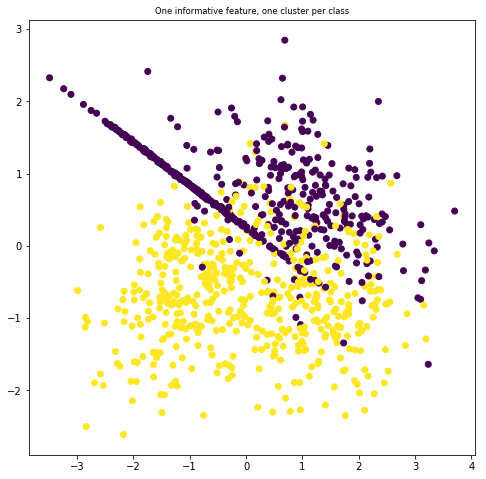

In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples = 1000, n_features = 20, n_redundant = 6, n_informative = 2,
                             n_clusters_per_class = 2, hypercube = True, random_state = 2)
Y1 = 2 * Y1 - 1
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c = Y1)
plt.show()

**(3 балла)** Реализуйте градиентный спуск и протестируйте его для случая логистической регрессии на ранее сгенерированной выборке. Для сравнения качества разных подходов используйте значение оптимизируемого функционала.

В качестве критерия останова мы предлагаем использовать следующие условия:
 - евклидова норма разности текущего и нового векторов весов стала меньше, чем 1e-4
 - ограничение на число итераций (например, 10000)
 
Для начальной инициализации весов нужно сравнить следующие подходы:
 - нулевая начальная инициализация
 - случайная
 
Выполните следующие пункты и прокомментируйте полученные результаты:
- Рассмотрите как влияет размер шага на сходимость (попробуйте не менее 5-ти различных значений).
- Рассмотрите регуляризованную модель, которая описана выше, а также модель без регуляризатора. Сравните влияет ли наличие регуляризации на скорость сходимости и качество.
- Исследуйте качества оптимизируемого функционала в зависимости от номера итерации (при правильной реализации и подходящем размере шага он должен убывать).
- Влияет ли выбор начальной инициализации весов на скорость и качество?

В каждом пункте требуется построить необходимые графики скорости/качества и дать исчерпывающие выводы.

Реализуем градиентный спуск.

In [221]:
import math
from numpy import linalg
import scipy.linalg as sla
from scipy import special

def LossFunction(X, y, w, C=0):
    return np.mean(np.logaddexp(0, -y * X.dot(w))) + C/2.0 * sla.norm(w) * sla.norm(w)  

def LogisticGrad(X, y, w, C=0):
    exp = special.expit(y * (X.dot(w.T))) - 1
    return np.mean(X.T.dot(y * np.diag(exp)), axis=1) + C * w

In [357]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
        
class GD(BaseEstimator, ClassifierMixin):
    def __init__(self, step=0.01, C=0, tol=1e-4, max_iter=10000, init="zeros", stop_crit='weight'):
        self.C = C
        self.tol = tol
        self.init = init
        self.step = step
        self.max_iter = max_iter
        self.stop_crit = stop_crit
        self.final_iter, self.errors = 0, []
        self.fit_time = 0

    def initialize(self):
        if self.init == 'zeros':
            return np.zeros(self.n_features)
        elif self.init == 'random':
            return np.random.normal(size=(self.n_features), scale=0.5)

    def fit(self, X, y):
        fit_start = time()
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.X, self.y = X, y
        self.n_features = X.shape[1]
        self.w = self.initialize()

        for _ in range(self.max_iter):
            self.final_iter += 1
            delta_w = -self.step * LogisticGrad(X, y, self.w, self.C)        
            self.w += delta_w
            self.errors.append(LossFunction(X, y, self.w, self.C))
            if linalg.norm(delta_w) < self.tol:
                break 
        self.fit_time = time() - fit_start
        # Return the classifier
        return self

    def predict_proba(self, X):
        return special.expit(X.dot(self.w))
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

- Рассмотрите как влияет размер шага на сходимость (попробуйте не менее 5-ти различных значений).

Рассмотрим, как влияет размер шага на сходимость.

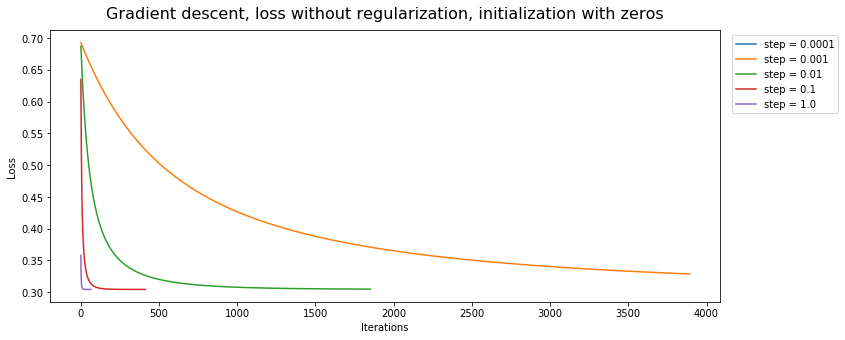

In [353]:
h_range = np.logspace(-4, 0, num=5)
plt.figure(figsize=(12, 5))

for i in range(len(h_range)):
    gd = GD(step=h_range[i], C=0)
    gd.fit(X1, Y1)
    plt.plot(np.arange(gd.final_iter), gd.errors, label='step = {}'.format(h_range[i]))

plt.title('Gradient descent, loss without regularization, initialization with zeros', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

Видно, что чем больше шаг, тем выше скорость сходимости. 

- Рассмотрите регуляризованную модель, которая описана выше, а также модель без регуляризатора. Сравните влияет ли наличие регуляризации на скорость сходимости и качество.

Посмотрим, как влияет коэффициент регуляризации на скорость сходимости градиентного спуска.

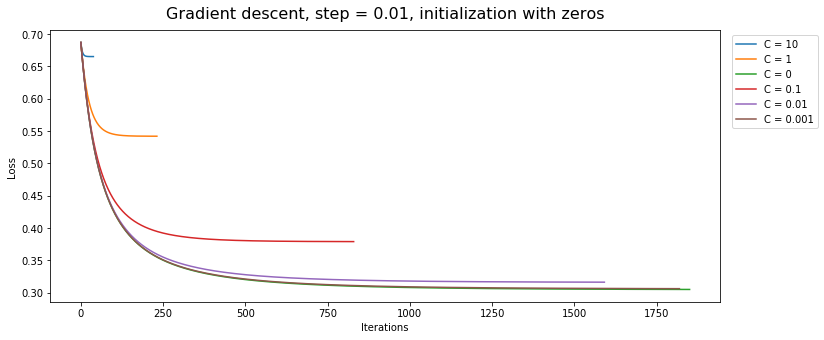

In [354]:
plt.figure(figsize=(12, 5))
reg = [10, 1, 0, 0.1, 0.01, 0.001]
n = len(reg)

for i in range(n):
    gd = GD(step=0.01, C=reg[i])
    gd.fit(X1, Y1)
    plt.plot(np.arange(gd.final_iter), gd.errors, label='C = {}'.format(reg[i]))

plt.title('Gradient descent, step = 0.01, initialization with zeros', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

Значение C = 0 соответствует отсутствию регуляризации. Видно, что как раз зелёный график сходится дольше всех.

Видно, что наличие регуляризации влияет на скорость сходимости градиентного спуска. Однако также видно, что при больших С градиентный спуск сходится слишком рано. Это означает, что качество функционала при больших C плохое.

- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации (при правильной реализации и подходящем размере шага он должен убывать).

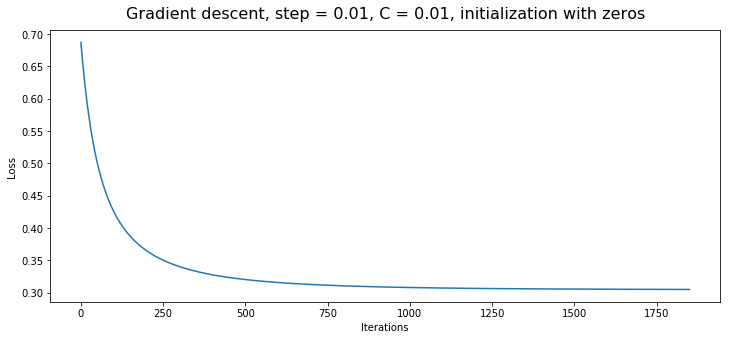

In [358]:
gd = GD(step=0.01)
gd.fit(X1, Y1)

plt.figure(figsize=(12, 5))
plt.plot(np.arange(gd.final_iter), gd.errors)
plt.title('Gradient descent, step = 0.01, C = 0.01, initialization with zeros', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

Да, при фиксированных параметрах график качества оптимизируемого функционала действительно убывает.

- Влияет ли выбор начальной инициализации весов на скорость и качество?

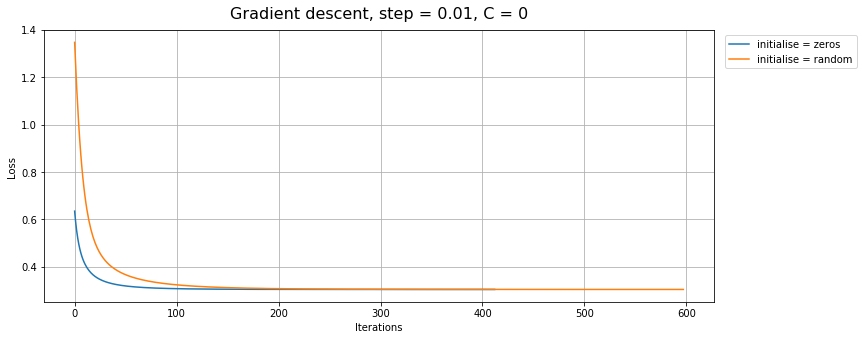

In [356]:
plt.figure(figsize=(12, 5))
gd = GD(step=0.1, init='zeros', C=0)
gd.fit(X1, Y1)
plt.plot(np.arange(gd.final_iter), gd.errors, label='initialise = {}'.format('zeros'))

gd = GD(step=0.1, init='random', C=0)
gd.fit(X1, Y1)
plt.plot(np.arange(gd.final_iter), gd.errors, label='initialise = {}'.format('random'))

plt.grid()
plt.title('Gradient descent, step = 0.01, C = 0', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

Видно, что при инициализации нулями сходимость происходит быстрее и к тому же качеству, что и при инициализации случайным вектором.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому обычно используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит сразу по этому объекту. 

**(1.5 балл)** Реализуйте метод стохастического градиентного спуска (sgd). В этом случае вы можете выбрать наиболее удачный функционал, исходя из предыдущего пункта (с регуляризацией, без), а также схему начальной инициализации весов. Реализуйте метод в виде класса, удовлетворяющего интерфейсу scikit-learn ([тут есть пример](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)).

Сравните рассмотренные методы (градиентный спуск и sgd) между собой с точки зрения скорости сходимости и качества.

- Посмотрите как влияет размер шага на сходимость (попробуйте 4-5 различных значений)
- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации

Выберите лучший размер шага и сравните качество и скорость сходимости реализованного метода и [его аналога из scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (не забудьте выставить значения важных параметров tol и learning_rate для сравнения методов в приближённо равных условиях). Насколько получилось лучше/хуже, в чём могут быть причины?

В каждом пункте сделайте исчерпывающие выводы, подкреплённые графиками.

Реализуем SGD.

In [467]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

def LossFunction(X, y, w, C=0):
    return np.mean(np.logaddexp(0, -y * X.dot(w))) + C/2.0 * sla.norm(w) * sla.norm(w)  

def LogisticGrad(X, y, w, C=0):
    exp = special.expit(y * (X.dot(w.T))) - 1
    return np.mean(X.T.dot(y * np.diag(exp)), axis=1) + C * w
        
class SGD(BaseEstimator, ClassifierMixin):
    def __init__(self, step=0.01, C=0, tol=1e-4, max_iter=10000, init="zeros", stop_crit='weight'):
        self.C = C
        self.tol = tol
        self.init = init
        self.step = step
        self.max_iter = max_iter
        self.stop_crit = stop_crit
        self.final_iter, self.errors = 0, []
        self.fit_time = 0

    def initialize(self):
        if self.init == 'zeros':
            return np.zeros(self.n_features)
        elif self.init == 'random':
            return np.random.normal(size=(self.n_features), scale=0.5)

    def fit(self, X, y):
        fit_start = time()
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        # self.classes_ = unique_labels(y)
        self.X, self.y = X, y
        self.n_features = X.shape[1]
        self.w = self.initialize()
        indices = range(X.shape[0])

        for _ in range(self.max_iter):
            self.final_iter += 1
            random_index = np.random.choice(indices)
        
            X_rand = X[random_index, :].reshape(1, X.shape[1])      
            y_rand = y[random_index: random_index + 1]
        
            delta_w = -self.step * LogisticGrad(X_rand, y_rand, self.w, self.C)        
            self.w += delta_w
            self.errors.append(LossFunction(X, y, self.w, self.C))
            if self.stop_crit == 'weight' and linalg.norm(delta_w) < self.tol:
                break
            if self.stop_crit == 'function':
                if (len(self.errors) >= 2) and linalg.norm(self.errors[-1] - self.errors[-2]) < self.tol:
                    break
        self.fit_time = time() - fit_start
        # Return the classifier
        return self

    def predict_proba(self, X):
        return special.expit(X.dot(self.w))
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Сравним SGD и GD по скорости сходимости и качеству.

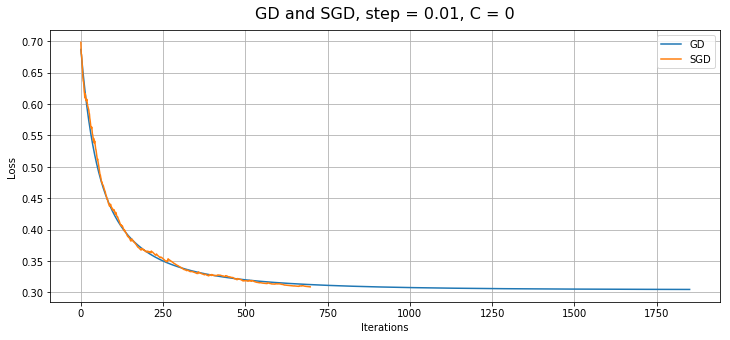

In [362]:
plt.figure(figsize=(12, 5))
gd = GD(step=0.01, init='zeros')
gd.fit(X1, Y1)
plt.plot(np.arange(gd.final_iter), gd.errors, label='GD')

sgd = SGD(step=0.01, init='zeros')
sgd.fit(X1, Y1)
plt.plot(np.arange(sgd.final_iter), sgd.errors, label='SGD')

plt.grid()
plt.title('GD and SGD, step = 0.01, C = 0', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')

Видно, что SGD сходится за меньшее число шагов.

In [363]:
print("Number of steps before сonvergence for GD: {}".format(gd.final_iter))
print("Quality for GD: {}\n".format(LossFunction(X1, Y1, gd.w)))

print("Number of steps before сonvergence for SGD: {}".format(sgd.final_iter))
print("Quality for SGD: {}".format(LossFunction(X1, Y1, sgd.w)))

Number of steps before сonvergence for GD: 1851
Quality for GD: 0.30481717088706595

Number of steps before сonvergence for SGD: 698
Quality for SGD: 0.3089520515153262


Качество у GD лучше. Однако время работы SGD намного меньше, чем время работы GD.

In [364]:
print("Fit time for GD: ", gd.fit_time)
print("Fit time for SGD: ", sgd.fit_time)

Fit time for GD:  13.007129192352295
Fit time for SGD:  0.24454808235168457


- Посмотрите как влияет размер шага на сходимость (попробуйте 4-5 различных значений)

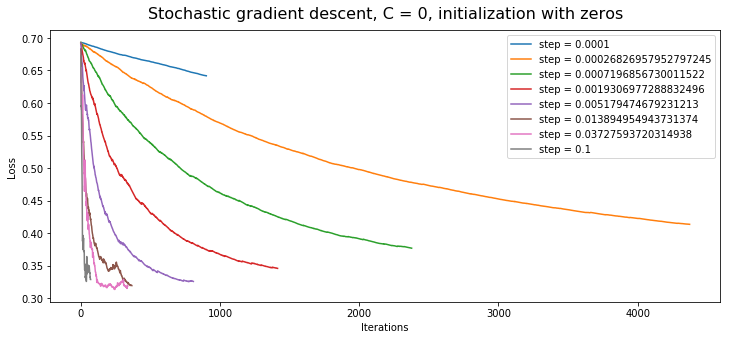

In [366]:
h_range = np.logspace(-4, -1, num=8)
plt.figure(figsize=(12, 5))

for i in range(len(h_range)):
    sgd = SGD(step=h_range[i])
    sgd.fit(X1, Y1)
    final_iter, errors = sgd.final_iter, sgd.errors
    plt.plot(np.arange(final_iter), errors, label='step = {}'.format(h_range[i]))

plt.title('Stochastic gradient descent, C = 0, initialization with zeros', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')

Видно, что если шаг слишком маленький, то метод сходится очень медленно (либо быстро, но к очень плохому качеству, как для step=0.0001), а если слишком большой, то метод становится неустойчивым. Оптимальный шаг примерно равен 0.013.

- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации

Text(0.5,1.02,'Stochastic gradient descent, loss without regularization, step = 0.013, initialization with zeros')

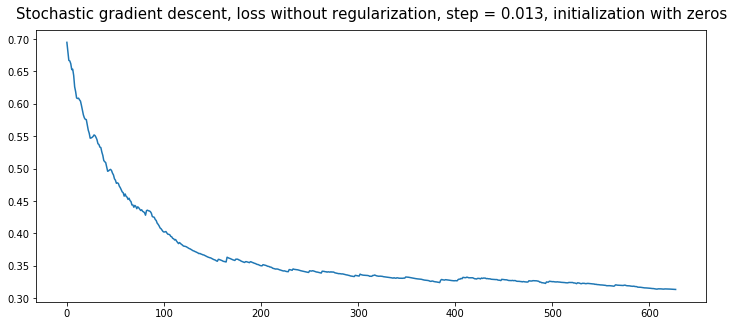

In [367]:
sgd = SGD(step=0.013)
sgd.fit(X1, Y1)
final_iter, errors = sgd.final_iter, sgd.errors

plt.figure(figsize=(12, 5))
plt.plot(np.arange(final_iter), errors, label='step = {}'.format(step))
plt.title('Stochastic gradient descent, loss without regularization, step = 0.013, initialization with zeros', fontsize=15, y=1.02)

График качества убывает в зависимости от номера шага, как и должно быть.

Сравним SGD и SGDClassifier с одинаковыми параметрами max_iter и step (eta0 для SGDClassifier) по числу шагов до сходимости и значению минимизируемого функционала на найденном векторе w. Чтобы они минимизировали одну и ту же функцию, положим аттрибут loss\_function_  у SGDClassifier равным нашей LossFunction.

**SGDClassifier**

In [368]:
from sklearn.linear_model import SGDClassifier

In [369]:
sgd_sklearn = SGDClassifier(tol=1e-4, eta0=0.013, learning_rate='constant', max_iter=1000, penalty=None)
sgd_sklearn.loss_function_ = LossFunction
sgd_sklearn.fit(X1, Y1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.013, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty=None, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, verbose=0, warm_start=False)

In [370]:
print("Number of steps before сonvergence for SGDClassifier: {}".format(sgd_sklearn.n_iter_))
print("Quality for SGDClassifier: {}".format(LossFunction(X1, Y1, sgd_sklearn.coef_[0].T)))

Number of steps before сonvergence for SGDClassifier: 5
Quality for SGDClassifier: 0.31875053882829074


**SGD**

In [371]:
sgd_mine = SGD()
sgd_mine.fit(X1, Y1)

print("Number of steps before сonvergence for SGD: {}".format(sgd_mine.final_iter))
print("Quality for SGD: {}".format(LossFunction(X1, Y1, sgd_mine.w)))

Number of steps before сonvergence for SGD: 729
Quality for SGD: 0.3141581265051441


Видно, что качество у SGD лучше, чем у SGDClassifier, но SGDClassifier сходится меньше, чем за 10 шагов. Одна из причин столь быстрой сходимости, я думаю, такая: SGDClassifier останавливается в тот момент, когда оптимизируемый функционал перестал меняться, а SGD останавливается в тот момент, когда перестал меняться вектор весов. От этого итераций сильно больше. Проверим это (заменим критерий в SGD).

In [372]:
sgd_mine = SGD(C=0, step=0.013, stop_crit='function')
sgd_mine.fit(X1, Y1)

print("Number of steps before сonvergence for SGD: {}".format(sgd_mine.final_iter))
print("Quality for SGD: {}".format(LossFunction(X1, Y1, sgd_mine.w)))

Number of steps before сonvergence for SGD: 176
Quality for SGD: 0.3564794749246538


Шагов стало меньше (хоть и всё равно сильно больше 10). А качество хуже. Наверное всё-таки основная тайна в том, что SGDClassifier, скорее всего, использует mini-batch.

В дальнейшем у меня будет старый критерий (что вектор весов перестал меняться).

**(0.5 балла)** Добавьте в выборку случайный шум следующим способом:
 1. Выберите случайно 3% объектов из сгенерированной ранее выборки.
 2. Сдвиньте эти объекты на $\mathcal{N}(0; 3 * scale)$, где $scale$ —  масштаб, который был использован при генерации объектов (параметр $scale$ в make_classification).
 3. Инвертируйте классы выбранных объектов.
 
Для GD и SGD сравните скорость сходимости и значение функции потерь до и после добавления шума. Сделайте необходимые выводы, подкреплённые графиками.

In [373]:
def get_noised_data(n_samples=1000, n_features=20):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_redundant=6, n_informative=2,
                             n_clusters_per_class=2, hypercube=True, random_state=2)
    y = 2 * y - 1
    indicies = np.random.permutation(n_samples)[:int(n_samples * 0.03)]
    noise = np.random.normal(scale=3,size=(len(indicies), n_features))
    X[indicies] = X[indicies] + noise
    y[indicies] = y[indicies] * (-1)
    return X, y

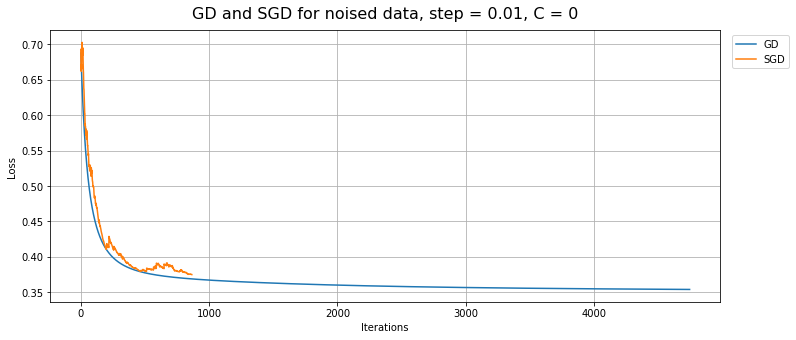

In [377]:
X, y = get_noised_data()

plt.figure(figsize=(12, 5))
gd = GD(step=0.01, init='zeros')
gd.fit(X, y)
plt.plot(np.arange(gd.final_iter), gd.errors, label='GD')

sgd = SGD(step=0.01, init='zeros')
sgd.fit(X, y)
plt.plot(np.arange(sgd.final_iter), sgd.errors, label='SGD')

plt.grid()
plt.title('GD and SGD for noised data, step = 0.01, C = 0', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')

In [378]:
print("Number of steps before сonvergence for GD: {}".format(gd.final_iter))
print("Quality for GD: {}\n".format(LossFunction(X1, Y1, gd.w)))

print("Number of steps before сonvergence for SGD: {}".format(sgd.final_iter))
print("Quality for SGD: {}".format(LossFunction(X1, Y1, sgd.w)))

Number of steps before сonvergence for GD: 4748
Quality for GD: 0.31400839466913283

Number of steps before сonvergence for SGD: 866
Quality for SGD: 0.3286746007823016


In [379]:
print("Fit time for GD: ", gd.fit_time)
print("Fit time for SGD: ", sgd.fit_time)

Fit time for GD:  33.70901608467102
Fit time for SGD:  0.3593289852142334


Видно, что SGD стал сходиться за большее число шагов. Также видно, что качество у GD и SGD ухудшилось.

Между обновлением вектора весов по всей выборке и на одном объекте есть промежуточный подход — выбирать некоторое случайное подмножество объектов и обновлять веса по нему. Такой подход называется mini-batch. Мы не будем реализовывать этот подход в данной работе, однако иногда его бывает осмысленно использовать на практике. 

Один из недостатков sgd состоит в том, что он может не доходить до локального оптимального решения, а осциллировать в окрестности. 

![](http://sebastianruder.com/content/images/2015/12/without_momentum.gif)

Для решения этой проблемы существуют методы, позволяющие устранить этот недостаток, а также ускорить сходимость. Рассмотрим некоторые из них.

![](http://nghenglim.github.io/images/2015061300.png)

### Momentum

Этот метод позволяет направить sgd в нужной размерности и уменьшить осцилляцию. 

В общем случае он будет выглядеть следующим образом: 

$$ v_t = \gamma v_{t - 1} + \eta \nabla_{\theta}{J(\theta)}$$
$$ \theta = \theta - v_t$$

где

 - $\theta$ — вектор параметров (в нашем случае — $w$)
 - $J$ — оптимизируемый функционал
 - $\gamma$ — momentum term (обычно выбирается 0.9)
 
### Adagrad 

Одной из сложностей является выбор размера шага (*learning rate*). Основное отличие данного метода от SGD состоит в том что размер шага определяется для каждого параметра индивидуально. Этот метод хорошо работает с разреженным данным большого объема. 

Обозначим градиент по параметру $\theta_i$ на итерации $t$ как $g_{t,i} = \nabla_{\theta}J(\theta_i)$. 

В случае sgd обновление параметра $\theta_i$ будет выглядеть следующим образом:

$$ \theta_{t+1, i} = \theta_{t, i} - \eta \cdot g_{t,i}$$

А в случае Adagrad общий шаг $\eta$ нормируется на посчитанные ранее градиенты для данного параметра:

$$ \theta_{t+1, i} = \theta_{t, i} - \dfrac{\eta}{\sqrt{G_{t,ii} + \varepsilon}} \cdot g_{t,i}$$

где $G_t$ — диагональная матрица, где каждый диагональный элемент $i,i$ — сумма квадратов градиентов для $\theta_{i}$ до $t$-ой итерации. $\varepsilon$ — гиперпараметр, позволяющий избежать деления на 0 (обычно выбирается около *1e-8*).

Так как матрица $G_t$ диагональна, в векторном виде это будет выглядеть следующим образом (здесь $\odot$ — матричное умножение):

$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{G_t + \varepsilon}} \odot g_t $$

### Adadelta

Adadelta, в отличии от Adagrad, рассматривает не все предыдущие значения градиентов, а только последние $k$. Кроме того, сумма градиентов определяется как уменьшающееся среднеее всех предыдущих квадратов градиентов. Текущее среднее $E[g^2]_t$ на итерации $t$ будет вглядеть следующим образом:

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 $$

здесь $\gamma$ аналогична гиперпараметру из метода Momentum.

Тогда обновление весов можно записать следующим образом:

$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Перепишем это немного по-другому:

$$ \theta_{t+1} = \theta_{t} + \Delta \theta_t$$ 
$$\Delta \theta_t = - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Аналогично среднему для градиентов определим среднее для параметров $\theta$:

$$ E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1-\gamma)\Delta \theta^2 $$

Введем обозначение $RMS[p]_t = \sqrt{E[p]_t + \varepsilon}$

Тогда Adadelta выглядит следующим образом:

$$\Delta \theta_t = - \dfrac{RMS[\Delta \theta^2]}{RMS[ga^2]} g_t $$ 
$$ \theta_{t+1} = \theta_{t} + \Delta \theta_t$$ 


Более подробно об этих и других способах оптимизации можно прочитать:
 - [здесь](http://sebastianruder.com/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms) очень хорошее описание различных способов оптимизации, в этом задании мы опираемся на терминологию из данной статьи
 - статья про [momentum](https://pdfs.semanticscholar.org/97da/c94ffd7a7ac09a4218848300cc7e98569d77.pdf)
 - оригинальная статья про [adagrad](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)
 - оригинальная статья про [adadelta](http://arxiv.org/pdf/1212.5701v1.pdf)
 - википедия про [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) и [adagrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad)
 - [визуализация](http://imgur.com/a/Hqolp) разных способов оптимизации

### Задание

Реализуйте метод оптимизации *Momentum* **(0.5 балла)** и один из *Adagrad*/*Adadelta* **(1 балл)**.
- Сравните оба метода с классическим sgd с точки зрения скорости сходимости.
- Посмотрите как значение гиперпараметра $\gamma$ влияет на скорость сходимости и качество в методе *Momentum*.

В заданиях выше требуется построить графики и описать полученные результаты.

Дало ли преимущество использование адаптивного шага в методе *Adagrad*/*Adadelta*?

## *Momentum*

In [382]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

def LossFunction(X, y, w, C=0):
    return np.mean(np.logaddexp(0, -y * X.dot(w))) + C/2.0 * sla.norm(w) * sla.norm(w)  

def LogisticGrad(X, y, w, C=0):
    exp = special.expit(y * (X.dot(w.T))) - 1
    return np.mean(X.T.dot(y * np.diag(exp)), axis=1) + C * w

class Momentum(BaseEstimator, ClassifierMixin):
    def __init__(self, step=0.01, C=0, tol=1e-4, max_iter=10000, init="zeros", stop_crit='weight', gamma=0.9):
        self.C = C
        self.tol = tol
        self.init = init
        self.step = step
        self.max_iter = max_iter
        self.stop_crit = stop_crit
        self.final_iter, self.errors = 0, []
        self.fit_time = 0
        self.gamma = gamma

    def initialize(self):
        if self.init == 'zeros':
            self.w = np.zeros(self.n_features)
        elif self.init == 'random':
            self.w = np.random.normal(size=(self.n_features), scale=0.5)

    def fit(self, X, y):
        fit_start = time()
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.X, self.y = X, y
        self.n_features = X.shape[1]
        self.initialize()
        V = np.zeros(self.n_features)
        indices = range(X.shape[0])

        for _ in range(self.max_iter):
            self.final_iter += 1
            random_index = np.random.choice(indices)
        
            X_rand = X[random_index, :].reshape(1, X.shape[1])      
            y_rand = y[random_index: random_index + 1]
             
            V = self.gamma * V + self.step * LogisticGrad(X_rand, y_rand, self.w, self.C) 
            self.w -= V
            self.errors.append(LossFunction(X, y, self.w, self.C))
            if linalg.norm(V) < self.tol:
                break 
        self.fit_time = time() - fit_start
        # Return the classifier
        return self

    def predict_proba(self, X):
        return special.expit(X.dot(self.w))
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Сравним SGD и Momentum с точки зрения качества и скорости сходимости при разных значениях learning rate (у меня называемого step).

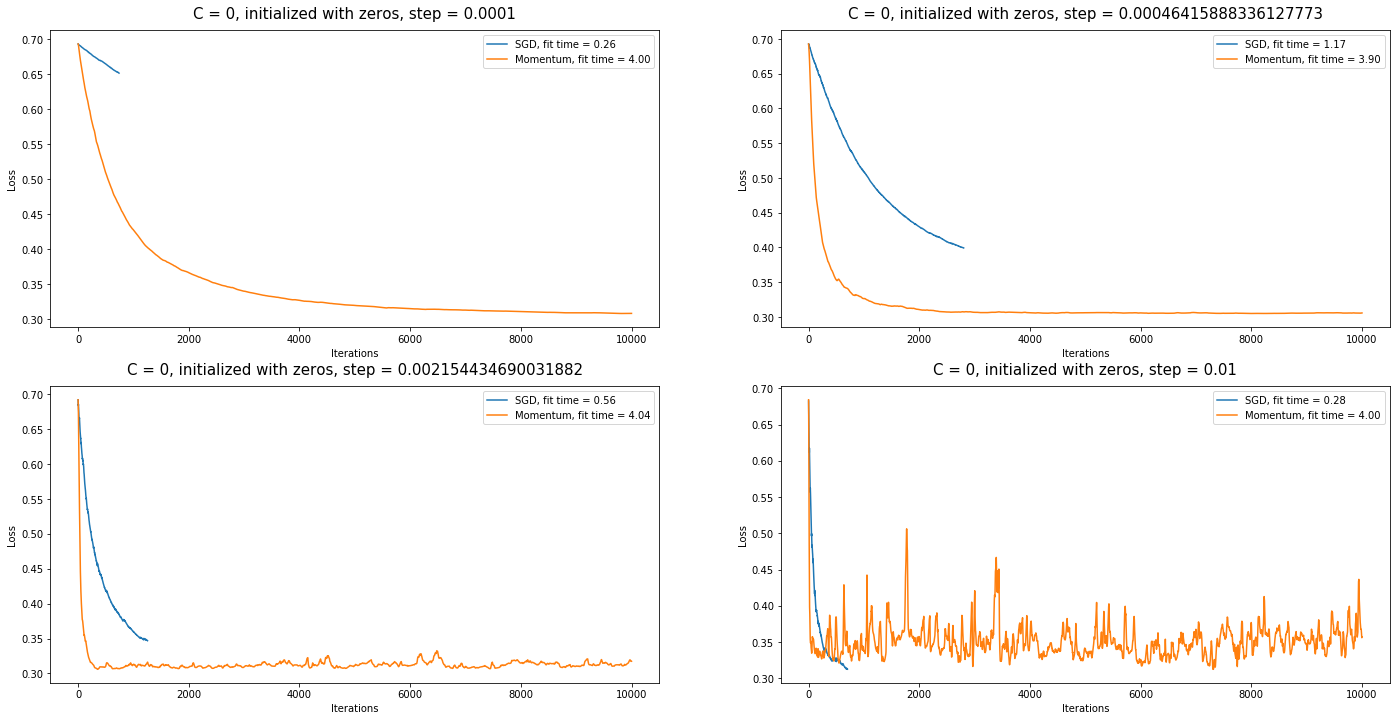

In [384]:
h_0 = np.logspace(-4, -2, 4)
h_range = np.array([ [h_0[0], h_0[1]], [h_0[2], h_0[3]] ])

f, a = plt.subplots(2, 2, figsize=(24, 6 * h_range.shape[0]))

for i in range(h_range.shape[0]):
    for j in range(h_range.shape[0]):
        sgd = SGD(step=h_range[i, j])
        sgd.fit(X1, Y1)
        final_iter, errors = sgd.final_iter, sgd.errors
        a[i, j].plot(np.arange(final_iter), errors, label='SGD, fit time = {:03.2f}'.format(sgd.fit_time))
    
        momentum = Momentum(step=h_range[i, j])
        momentum.fit(X1, Y1)
        final_iter, errors = momentum.final_iter, momentum.errors
        a[i, j].plot(np.arange(final_iter), errors, 
                     label='Momentum, fit time = {:03.2f}'.format(momentum.fit_time))
    
        a[i, j].set_xlabel('Iterations')
        a[i, j].set_ylabel('Loss')
        a[i, j].set_title('C = 0, initialized with zeros, step = {}'.format(h_range[i, j]), y = 1.02, fontsize=15)
        a[i, j].legend(loc='best')

По графикам видно, что Momentum при всех величинах шага сходился медленее по времени, чем SGD. Также видно, что для Momentum нужны более мелкие шаги, чем для SGD. При step = 0.01 Momentum становится неустойчивым, в то время как SGD довольно быстро сходится и к хорошему качеству. Поэтому не имеет смысла сравнивать их при одной и той же величине шага.

Сравним SGD при step = 0.013 и Momentum при step = 0.0004.

In [390]:
sgd = SGD(step=0.013)
sgd.fit(X1, Y1)
    
momentum = Momentum(step=0.0004)
momentum.fit(X1, Y1)

Momentum(C=0, gamma=0.9, init='zeros', max_iter=10000, step=0.0004,
     stop_crit='weight', tol=0.0001)

In [391]:
print("Number of steps before сonvergence for Momentum: {}".format(momentum.final_iter))
print("Quality for Momentum: {}\n".format(LossFunction(X1, Y1, momentum.w)))

print("Number of steps before сonvergence for SGD: {}".format(sgd.final_iter))
print("Quality for SGD: {}\n".format(LossFunction(X1, Y1, sgd.w)))

print("Fit time for Momentum: ", momentum.fit_time)
print("Fit time for SGD: ", sgd.fit_time)

Number of steps before сonvergence for Momentum: 10000
Quality for Momentum: 0.30579917543135576

Number of steps before сonvergence for SGD: 942
Quality for SGD: 0.3113295465610314

Fit time for Momentum:  3.8489861488342285
Fit time for SGD:  0.35628795623779297


SGD сходится быстрее, но качество у него чуть похуже.

Посмотрим теперь, как параметр $\gamma$ влияет на скорость сходимости и качество в методе Momentum.

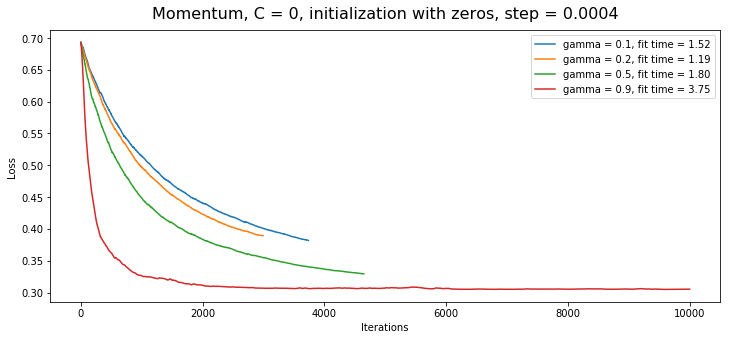

In [394]:
gamma = [0.1, 0.2, 0.5, 0.9]
plt.figure(figsize=(12, 5))

for i in range(len(gamma)):
    momentum = Momentum(step=0.0004, gamma=gamma[i])
    momentum.fit(X1, Y1)
    final_iter, errors = momentum.final_iter, momentum.errors
    plt.plot(np.arange(final_iter), errors, label='gamma = {}, fit time = {:03.2f}'.format(gamma[i], momentum.fit_time))

plt.title('Momentum, C = 0, initialization with zeros, step = 0.0004', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')

Видно, что при маленьких $\gamma$ хуже качество. Но при $\gamma = 0.9$ самая медленная сходимость.

## *Adagrad*

In [314]:
def LossFunction(X, y, w, C=0):
    return np.mean(np.logaddexp(0, -y * X.dot(w))) + C/2.0 * sla.norm(w) * sla.norm(w)  

def LogisticGrad(X, y, w, C=0):
    exp = special.expit(y * (X.dot(w.T))) - 1
    return np.mean(X.T.dot(y * np.diag(exp)), axis=1) + C * w

class Adagrad(BaseEstimator, ClassifierMixin):
    def __init__(self, step=0.01, C=0.001, tol=1e-4, max_iter=1000, init="zeros", stop_crit='weight'):
        self.C = C
        self.tol = tol
        self.init = init
        self.step = step
        self.max_iter = max_iter
        self.stop_crit = stop_crit
        self.final_iter, self.errors = 0, []
        self.fit_time = 0
        self.eps = 1e-8

    def initialize(self):
        if self.init == 'zeros':
            self.w = np.zeros(self.n_features)
        elif self.init == 'random':
            self.w = np.random.normal(size=(self.n_features), scale=0.5)

    def fit(self, X, y):
        fit_start = time()
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.X, self.y = X, y
        self.n_features = X.shape[1]
        self.initialize()
        G = np.zeros(self.n_features)
        indices = range(X.shape[0])

        for _ in range(self.max_iter):
            self.final_iter += 1
            random_index = np.random.choice(indices)
        
            X_rand = X[random_index, :].reshape(1, X.shape[1])      
            y_rand = y[random_index: random_index + 1]
            
            grad = LogisticGrad(X_rand, y_rand, self.w, self.C) 
            G += grad ** 2
            delta_w = -self.step * grad / (G + self.eps)**0.5  

            self.w += delta_w
            self.errors.append(LossFunction(X, y, self.w, self.C))
            if linalg.norm(delta_w) < self.tol:
                break
        self.fit_time = time() - fit_start
        # Return the classifier
        return self

    def predict_proba(self, X):
        return special.expit(X.dot(self.w))
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Найдём оптимальную длину шага для Adagrad.

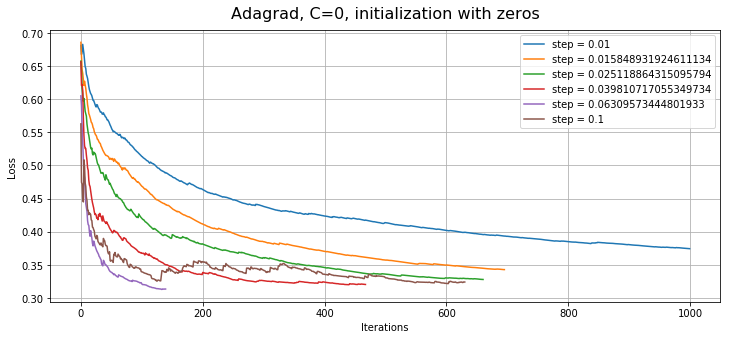

In [403]:
h_range = np.logspace(-2, -1, num=6)
plt.figure(figsize=(12, 5))

for i in range(len(h_range)):
    adagrad = Adagrad(step=h_range[i])
    adagrad.fit(X1, Y1)
    final_iter, errors = adagrad.final_iter, adagrad.errors
    plt.plot(np.arange(final_iter), errors, label='step = {}'.format(h_range[i]))
    
plt.title('Adagrad, C=0, initialization with zeros', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

Кажется, что хорошая длина шага примерно равна 0.04: Adagrad сходится к неплохому качеству, и график не очень сильно осциллирует.

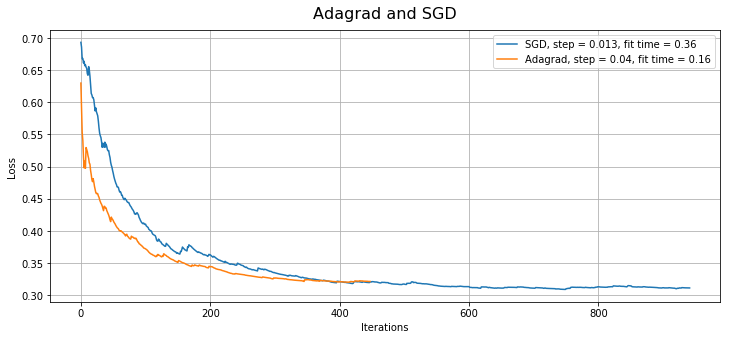

In [401]:
sgd_step, adagrad_step = 0.013, 0.04

plt.figure(figsize=(12, 5))
gd = SGD(step=sgd_step)
gd.fit(X1, Y1)
plt.plot(np.arange(sgd.final_iter), sgd.errors, label='SGD, step = {}, fit time = {:03.2f}'.format(sgd_step, sgd.fit_time))

adagrad = Adagrad(step=adagrad_step)
adagrad.fit(X1, Y1)
plt.plot(np.arange(adagrad.final_iter), adagrad.errors, label='Adagrad, step = {}, fit time = {:03.2f}'.format(adagrad_step,
                                                                                                              adagrad.fit_time))

plt.grid()
plt.title('Adagrad and SGD', fontsize=16, y=1.02)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='best')

По графику видно, что Adagrad сошёлся быстрее.

In [404]:
print("Number of steps before сonvergence for Adagrad: {}".format(adagrad.final_iter))
print("Quality for Adagrad: {}\n".format(LossFunction(X1, Y1, adagrad.w)))

print("Number of steps before сonvergence for SGD: {}".format(sgd.final_iter))
print("Quality for SGD: {}\n".format(LossFunction(X1, Y1, sgd.w)))

print("Fit time for Adagrad: ", adagrad.fit_time)
print("Fit time for SGD: ", sgd.fit_time)

Number of steps before сonvergence for Adagrad: 631
Quality for Adagrad: 0.3230649772943433

Number of steps before сonvergence for SGD: 942
Quality for SGD: 0.3113295465610314

Fit time for Adagrad:  0.22609782218933105
Fit time for SGD:  0.35628795623779297


Качество у Adagrad хуже, но скорость сходимости выше. В плане скорости сходимости использование адаптивного шага дало преимущество.

### Многоклассовая классификация

Модель логистической регрессии можно обобщить для случая многоклассовой классификации. Метка класса теперь лежит во множестве $\{1, 2, ..., K\}$. Параметры модели $w$ в этом случае являются матрицей размерности $K \times M$, где $M$ − количество признаков. Обучение модели логистической регрессии в многоклассовом случае будет выглядеть следующим образом:

$$ -\dfrac{1}{N}\sum_{i=1}^N \sum_{k=1}^K [y_i = k] \log\Big(\frac{\exp(\langle w_k, x_i \rangle)}{\sum_{s=1}^K \exp(\langle w_s, x_i \rangle))}\Big) + \dfrac{C}{2}\lVert w \rVert^2  \to \min_w$$

Здесь $w_k$ обозначает $k$-ую строку матрицы $w$.

Обучать эту модель также можно с помощью градиентного спуска.

Кроме того существует другой, более универсальный способ решать задачу многоклассовой классификации. Для этого нужно обучить несколько бинарных моделей классификации, после чего на основании предсказаний по этим моделям вынести окончательный вердикт о принадлежности объекта одному из $K$ классов. Существует две популярные стратегии использования бинарных классификаторов для задачи многоклассовой классификации:
 - OvR (One-vs-Rest, One-vs-All) − стратегия, при которой каждый из $K$ классификаторов обучается отделять объекты одного класса от объектов всех остальных классов. В качестве предсказания используется тот класс, классификатор которого предсказал наибольшую вероятность среди всех.
 - OvO (One-vs-One) − стратегия, при которой каждый из $\frac{K(K-1)}{2}$ классификаторов учится разделять объекты пары классов, игнорируя объекты всех остальных классов. На этапе предсказания класс обычно выбирается путем голосования по вердиктам каждого из классификаторов.


### Задание

**(0.5 балла)** Покажите, что функция потерь для многоклассовой классификации сводится к [функции потерь для бинарной классификации](#log_reg) при $K=2$.
 

Перейдём от $y = \{1,2\}$ к $y = \{0,1\}$:

$$ 
Loss = -\dfrac{1}{N}\sum_{i=1}^N \sum_{k=1}^2 [y_i = k] \log\left(\frac{\exp(\langle w_k, x_i \rangle)}{\sum_{s=1}^2 \exp(\langle w_s, x_i \rangle))}\right)  = -\dfrac{1}{N}\sum_{i=1}^N \sum_{k=0}^1 [y_i = k] \log\left(\frac{\exp(\langle w_k, x_i \rangle)}{\sum_{s=0}^1 \exp(\langle w_s, x_i \rangle))}\right) = 
$$

$$ 
= -\dfrac{1}{N}\sum_{i=1}^N \left[  
    (1-y_i) \log\left(\frac{\exp(\langle w_0, x_i \rangle)}{\exp(\langle w_0, x_i \rangle ) + \exp(\langle w_1, x_i \rangle)} \right) + y_i \log\left(\frac{\exp(\langle w_1, x_i \rangle)}{\exp(\langle w_0, x_i \rangle ) + \exp(\langle w_1, x_i \rangle)}\right) \right] =
$$ 

$$ 
= -\dfrac{1}{N}\sum_{i=1}^N \left[   \log\left(\frac{\exp(\langle w_0, x_i \rangle)}{\exp(\langle w_0, x_i \rangle ) + \exp(\langle w_1, x_i \rangle)} \right) + y_i \log\left(\frac{\exp(\langle w_1, x_i \rangle)}{\exp(\langle w_0, x_i \rangle)}\right) \right] =
$$ 

$$
    = -\frac{1}{N} \sum_{i = 1}^N \left[ -\log\left(1 + e^{\langle w_1 - w_0, x_i \rangle}\right) + \log e^{y_i \langle w_1 - w_0, x_i \rangle} \right] =
    \frac{1}{N} \sum_{i = 1}^N \log \left( e^{-y_i \langle w_1 - w_0, x_i \rangle} + e^{(1 - y_i) \langle w_1 - w_0, x_i \rangle} \right)
$$

Видно, что:

- при $y_i = 0$: $Loss = \frac{1}{N} \sum_{i = 1}^N \log \left( 1 + e^{\langle w_1 - w_0, x_i \rangle} \right)$
- при $y_i = 1$: $Loss = \frac{1}{N} \sum_{i = 1}^N \log \left( 1 + e^{-\langle w_1 - w_0, x_i \rangle} \right)$

Если перейти от  $y = \{0,1\}$ к $y = \{-1,1\}$, то получим

$$
    Loss = \frac{1}{N} \sum_{i = 1}^N \log \left(1 + e^{-y_i \langle w_1 - w_0, x_i \rangle}\right)
$$

**(1 балл)** 
Сгенерируйте несколько выборок точек с 2 признаками и 3 классами (по 100 объектов каждого класса) на которых будете проводить эксперименты. Для этого можно воспользоваться функцией [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) из пакета sklearn.

Обучите [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из пакета sklearn тремя различными способами:
 - в режиме multinomial, оптимизирующем многоклассовую функцию потерь
 - в режиме OvR
 - в режиме OvO
 
Первые два способа реализованы в самом классе LogisticRegression, в то время как для решения задачи третьим методом в sklearn реализован класс [OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) (класс для OvR схемы [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), конечно, также присутствует в пакете).
 
 
 Проделайте следующие шаги для каждой стратегии и прокомментируйте полученные результаты:
 - Изобразите точки выборки, а также разделяющие прямые (их должно быть по 3 для каждой из стратегий). Проведите эксперимент на всех сгенерированных выборках.
 - Какие особенности, преимущества и недостатки с точки зрения построения разделяющих плоскостей, качества разделения классов и вычислительной эффективности характерны для каждого метода? Дайте развёрнутый ответ.
 - Для каждой из стратегий приведите примеры ситуаций, когда стоит выбирать ее для решения задачи многоклассовой классификации. Обоснуйте


Основная часть функции рисования PlotMulticlassSurface взята  [отсюда](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html)

In [12]:
def PlotMulticlassSurface(X, y, clf):
    clf.fit(X, y)

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)

    colors = ['g', 'b','r']
    for i in range(3):
        plt.scatter(*X[y==i].T, c=colors[i])

In [44]:
data = [make_blobs(n_samples=300, n_features=2, centers=3) for _ in range(3)]

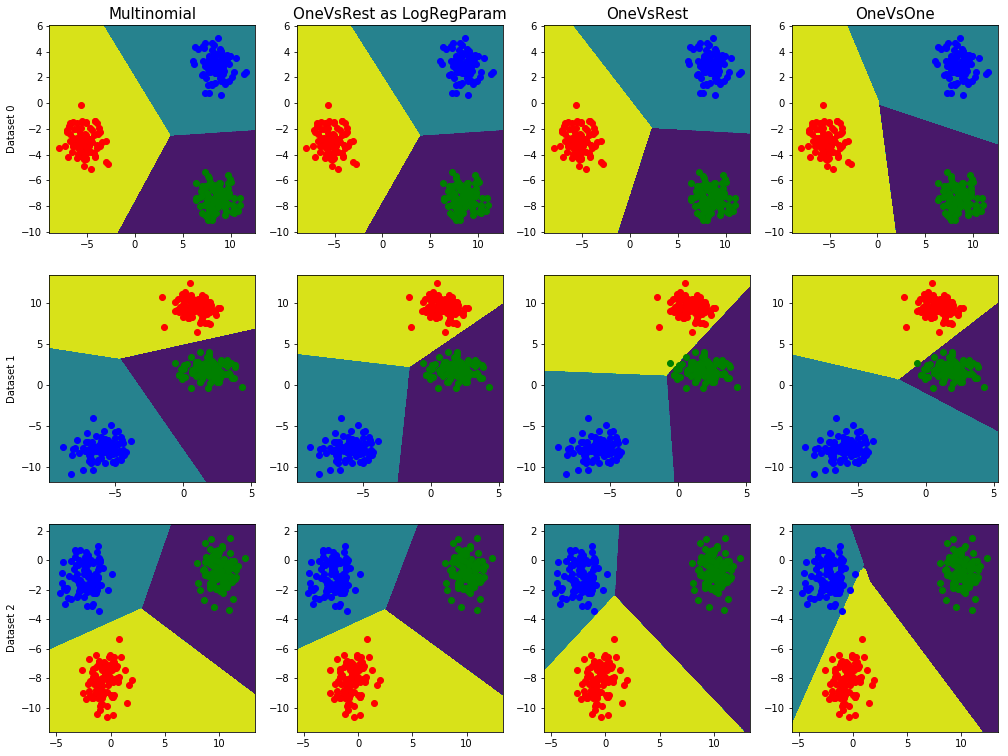

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.datasets import make_blobs

names = ['Multinomial', 'OneVsRest as LogRegParam', 'OneVsRest', 'OneVsOne']
clfs = [LogisticRegression(multi_class='multinomial', solver='lbfgs'), 
        LogisticRegression(multi_class='ovr', solver='lbfgs'),
        OneVsRestClassifier(LogisticRegression()),
        OneVsOneClassifier(LogisticRegression())]


plt.figure(figsize=(17, 13))
for j in range(3):
    for i in range(4):
        plt.subplot(3, 4, j * 4 + i + 1)
        PlotMulticlassSurface(*data[j], clfs[i])
        if i == 0:
            plt.ylabel('Dataset {}'.format(j))
        if j == 0:
            plt.title(names[i], fontsize=15)

**Какие особенности, преимущества и недостатки с точки зрения построения разделяющих плоскостей, качества разделения классов и вычислительной эффективности характерны для каждого метода? Дайте развёрнутый ответ.**
 
Я нарисовала картинки для OneVsRest дважды: на картинках серии OneVsRest as LogRegParam используется LogisticRegression(multi_class='ovr', solver='lbfgs'), а на картинках серии OneVsRest используется OneVsRestClassifier(LogisticRegression()). Я это сделала потому, что OneVsRest as LogRegParam работает явно лучше, чем OneVsOne, хотя теоретически должно быть не так: ведь у OneVsOne больше классификаторов, а значит, больше степеней свободы, и качество должно быть лучше. Но вывод в итоге такой: OneVsRest as LogRegParam работает лучше просто OneVsRest (более уверенная классификация), а OneVsRest работает лучше OneVsOne. Очень странно :( 

**Общие выводы:**

Лучшее качество классификации выдаёт логистическая регрессия с формулой многоклассовой классификации. Деление на классы уверенное: каждый класс достаточно удалён от границы. Вычислительная эффективность должна быть довольно хорошей, ведь мы обучаем ровно один классификатор.

Дальше по качеству идёт OneVsRest (и по вычсилительной эффективности), а за ним OneVsOne -- качество классификации он показал самое плохое на этих выборках и обучать его дольше всего.
 
** Для каждой из стратегий приведите примеры ситуаций, когда стоит выбирать ее для решения задачи многоклассовой классификации. Обоснуйте **

Самое лучшее качество показала многоклассовая регрессия. Если мы хотим использовать именно логистическую регрессию в качестве модели для классификации, то лучше пользоваться ей. Однако не все классификаторы имеют подобное обобщение на многомерный случай. Поэтому подходы OvO и OvR более универсальны и могут быть использованы для любого предложенного им классификатора.

OvR вычисляется легче OvO: для OvR требуется обучить $k$ классификаторов, а для OvO  -- $\frac{k(k - 1)}{2}$, где $k$ -- число классов. Кроме того, при использовании OvR каждый класс представляется своим классификатором, и этот классификатор содержит в себе информацию об этом классе, что удобно в некоторых ситуациях.

Есть ситуации, когда более выгодно применять OvO, чем OvR. Например, если имеется много классов, но представителей каждого класса мало. Тогда каждый классификатор для OvO будет обучаться на небольшом объёме данных, а при подходе OvR обучение может оказаться очень долгим.

## Линейная регрессия

![](http://66.147.244.197/~globerov/introspectivemode/wp-content/uploads/2012/08/regression-265x300.jpeg)

Метод градиентного спуска позволяет оптимизировать произвольные функции. Например, рассмотрим задачу линейной регрессии, где $y \in \mathbb{R}$, а алгоритм будет иметь вид $a(x) = \langle w, x\rangle$. В случае метода наименьших квадратов оптимизируемый функционал можно записать следующим образом:

$$ \sum_{i=1}^N (\langle w, x_i \rangle - y_i) ^ 2 \to \min_w$$

Эта задача интересна тем, что для нее можно выписать аналитическое решение. Попробуем сравнить эти подходы.

### Задание

Сгенерируйте выборку из 600 точек с двумя признаками для задачи регрессии, воспользовавшись функцией [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression). 

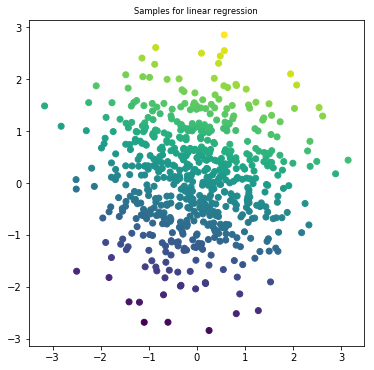

In [500]:
import numpy as np
import pandas as pd
import pylab as plt
import math
from numpy import linalg
%matplotlib inline
from sklearn.datasets import make_regression

plt.figure(figsize=(6, 6))

plt.title("Samples for linear regression", fontsize='small')
X2, Y2 = make_regression(600, 2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c = Y2)
plt.show()

**(0.5 балла)** Выпишите как выглядит точное решение задачи линейной регрессии. Решите задачу регрессии с помощью этого подхода без использования и с использованием регуляризации. Есть ли недостатки у такого подхода к решению задачи?

Точное решение:
$$ w = \left( X^T X + \frac{C}{2} \cdot I \right)^{-1} X^T y$$

In [655]:
def ExactSolution(X, y, C=0):
    return np.linalg.inv(X.T.dot(X) + C / 2. * np.eye(X.shape[1])).dot(X.T).dot(y)

def SquareLoss(X, y, w, C=0):
    return np.linalg.norm(X.dot(w) - y)**2  / X.shape[0] + C  * np.linalg.norm(w) ** 2

Решим теперь задачу регрессии с помощью точной формулы.

In [658]:
w = ExactSolution(X2, Y2)
w_reg = ExactSolution(X2, Y2, C=0.001)
print("w without regularization: ", w)
print("square loss: {}\n".format(SquareLoss(X2, Y2, w)))

print("w with regularization: ", w_reg)
print("square loss: ", SquareLoss(X2, Y2, w_reg))

w without regularization:  [ 14.74849279  63.01014565]
square loss: 7.997807944745446e-28

w with regularization:  [ 14.74847961  63.01009017]
square loss:  3.07482811028e-09


Недостатки у такого подхода есть: приходится обращать матрицу размера n, где n -- число признаков. При большом числе признаков эта операция затратна по времени. Плюс бывает, что матрица имеет большое число обусловленности, и тогда и она плохо обратима (тогда как раз нужна регуляризация).

**(0.5 балла)** Примените метод стохастического градиентного спуска реализованный ранее. Сильно ли отличается полученный вектор параметров по сравнению с точным решением? 

In [504]:
def LossFunction(w, X, y, C=0):
    return np.linalg.norm(X.dot(w) - y)**2 / X.shape[0] + C  * np.linalg.norm(w) ** 2

def LogisticGrad(X, y, w, C=0):
    return 2 * (X.dot(w) - y).dot(X) / X.shape[0] + 2 * C * w.T

In [517]:
sgd = SGD(step=0.1)
sgd.fit(X2, Y2)
print('w got by SGD: ', sgd.w)
print('square loss: ', LossFunction(w, X2, Y2))

w got by SGD:  [ 14.74989455  63.01041715]
square loss:  7.99780794475e-28


При шаге 0.1 полученный вектор весов не отличается от вектора весов, полученного с помощью точного решения без регуляризации. А при меньших шагах square loss более-менее то же, а вот вектор отличается сильно.

In [519]:
sgd = SGD(step=0.001)
sgd.fit(X2, Y2)
print('w got by SGD: ', sgd.w)
print('square loss: ', LossFunction(w, X2, Y2))

w got by SGD:  [-0.12924325  1.7427519 ]
square loss:  7.99780794475e-28


К сожалению, линейная регрессия позволяет хорошо восстанавливать *линейные* зависимости, однако в общем случае хуже работает с более сложными данными. Это хорошо можно увидеть на следующем примере.

Пусть исходная зависимость имеет вид $y = x \cdot sin(x)$. Сгенерируем соответствующие точки:

In [638]:
from sklearn.cross_validation import train_test_split

In [639]:
X = np.linspace(0, 10, 100)
y = X * np.sin(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

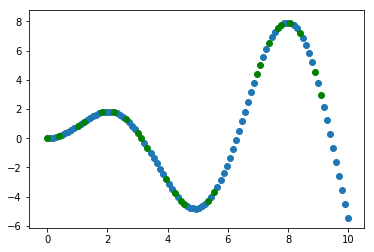

In [640]:
_ = plt.scatter(X_train, y_train)
_ = plt.scatter(X_test, y_test, c='g')

Если теперь к полученным данным применить модель линейной регрессии, то получим следующее решение:

In [641]:
from sklearn.linear_model import LinearRegression

In [642]:
lr = LinearRegression()
lr.fit(X_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

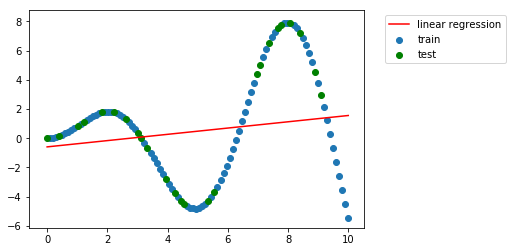

In [643]:
_ = plt.scatter(X_train, y_train)
_ = plt.scatter(X_test, y_test, c='g')
y_plot = lr.predict(X[:, np.newaxis])
_ = plt.plot(X, y_plot, c='r')
_ = plt.legend(('linear regression', 'train', 'test'), bbox_to_anchor=(1.05, 1), loc=2)

Качество модели регрессии можно оценивать с помощью некоторых метрик, например $MSE = \sum_{i=1}^l(a(x_i) - y_i)^2$ и в данном случае оно равно:

In [644]:
from sklearn.metrics import mean_squared_error

In [645]:
mean_squared_error(y_test, lr.predict(X_test[:, np.newaxis])) 

14.759977502823233

Построенное решение совсем отдаленно напоминает исходную зависимость. Одним из способов улучшить результат является добавление всех попарных произведений признаков, а также степеней: $x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2, \dots$

### Задание

**(0.5 балла)** Воспользуйтесь классом [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) и добавьте к данным зависимости $y = x \cdot sin(x)$ различные полиномы.

 - рассмотрите как степень полинома (от 1 до 20) влияет на качество
 - изобразите на графике предсказание аналогично линейной регрессии
 - сравните этот подход с функцией [polyfit](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html)

В чем могут быть недостатки такого подхода?

Рассмотрим, как степень полинома влияет на качество, -- изобразим зависимость качества от степени на графике.

In [646]:
from sklearn.preprocessing import PolynomialFeatures

MSE = []
for i in range(1,21):
    lr = LinearRegression()
    poly_feat = PolynomialFeatures(degree = i)
    lr.fit(poly_feat.fit_transform(X_train[:, None]), y_train)
    MSE.append(mean_squared_error(y_test, lr.predict(poly_feat.transform(X_test[:, None]))))

Text(0,0.5,'MSE')

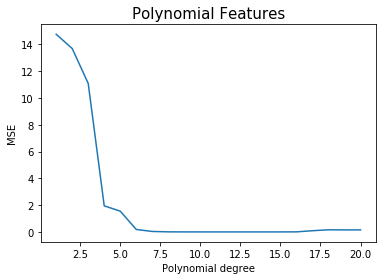

In [647]:
plt.plot(range(1, 21), MSE)
plt.title("Polynomial Features", fontsize=15)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')

Нарисуем такой же график для polyfit.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'MSE')

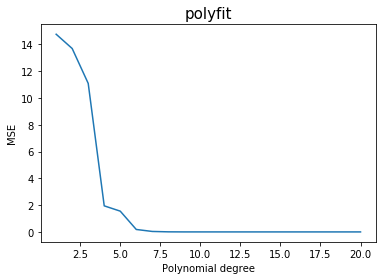

In [648]:
MSE = []
for i in range(1, 21):
    MSE.append(mean_squared_error(y_test, np.poly1d(np.polyfit(X_train, y_train, deg = i))(X_test)))

plt.plot(range(1, 21), MSE)
plt.title("polyfit", fontsize=15)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')

На обоих графиках видно, что ошибка падает при росте степени, однако для PolynomialFeatures она начинает чуть-чуть расти после 17 степени.

Изобразим на графике предсказание аналогично линейной регрессии.

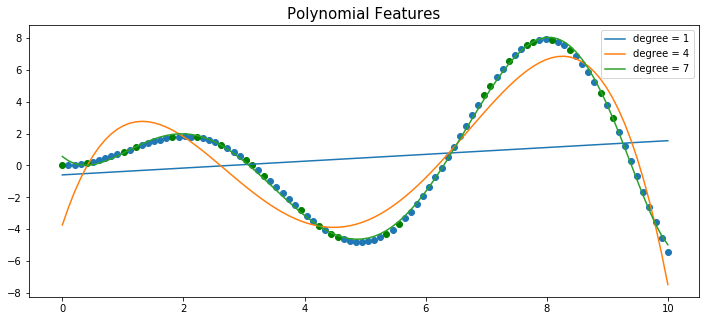

In [649]:
plt.figure(figsize = (12, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c = 'g')
plt.title("Polynomial Features", fontsize=15)

for i in range(1, 10, 3):
    lr = LinearRegression()
    poly_feat = PolynomialFeatures(degree = i)
    lr.fit(poly_feat.fit_transform(X_train[:, None]), y_train)
    y_plot = lr.predict(poly_feat.transform(X[:, np.newaxis]))
    plt.plot(X, y_plot, label = 'degree = ' + str(i))
    plt.legend(loc='best')

Сравним этот подход с функцией polyfit.

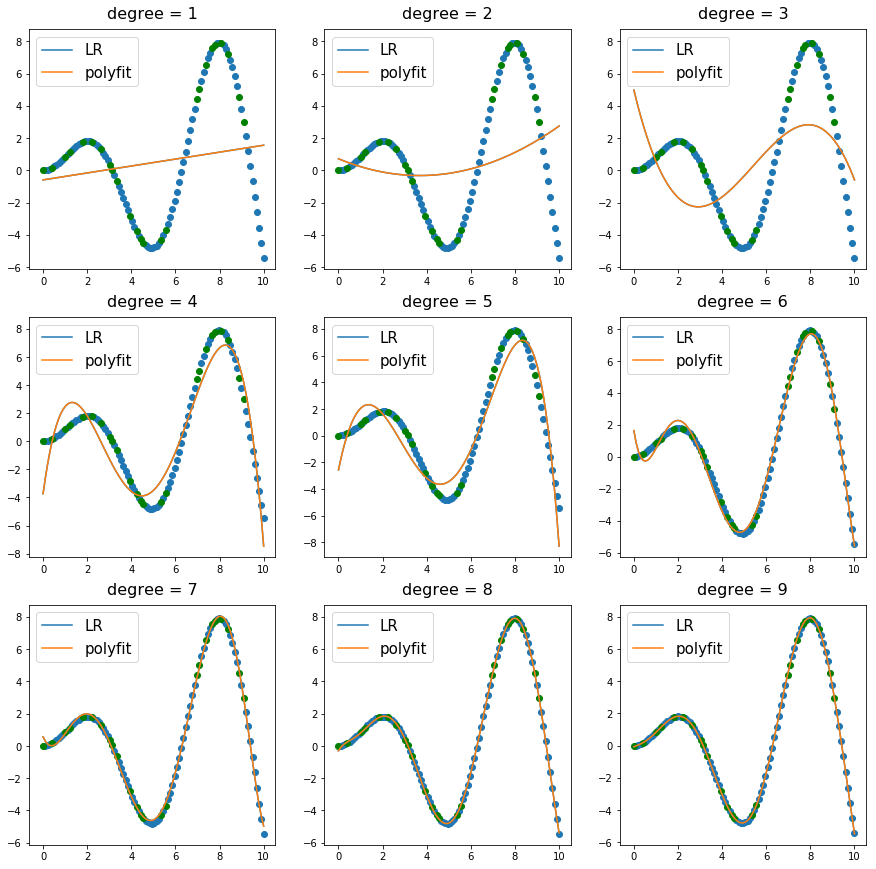

In [544]:
f, a = plt.subplots(3, 3, figsize=(15, 15))
deg = 1

for i in range(3):
    for j in range(3):
        a[i, j].set_title('degree = '  + str(deg), fontsize = 16, y=1.02)
        a[i, j].scatter(X_train, y_train)
        a[i, j].scatter(X_test, y_test, c = 'g')
    
        lr = LinearRegression()
        poly_feat = PolynomialFeatures(degree = deg)
        lr.fit(poly_feat.fit_transform(X_train[:, None]), y_train)
        y_plot = lr.predict(poly_feat.transform(X[:, np.newaxis]))
        a[i, j].plot(X, y_plot, label= 'LR')
    
        y_plot = np.poly1d(np.polyfit(X_train, y_train, deg))(X)
        a[i, j].plot(X, y_plot, label= 'polyfit')
        a[i, j].legend(loc='best', fontsize=15)
        deg += 1

До 9 степени включительно кривые полностью совпадают. Проверим на степенях побольше.

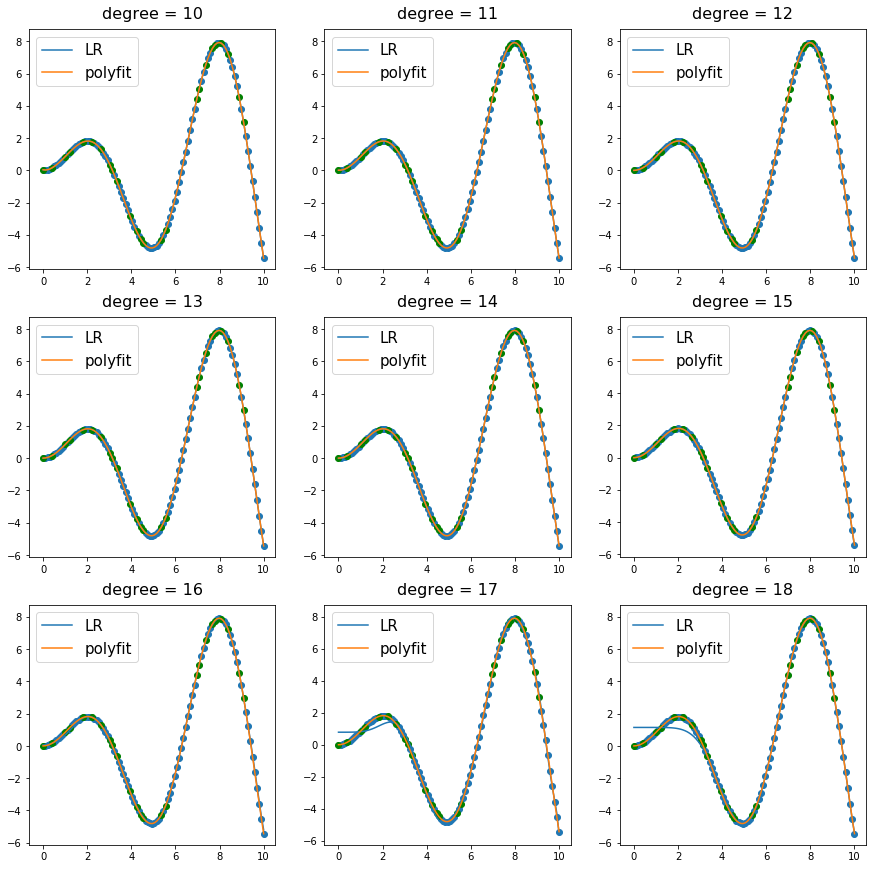

In [545]:
f, a = plt.subplots(3, 3, figsize=(15, 15))
deg = 10

for i in range(3):
    for j in range(3):
        a[i, j].set_title('degree = '  + str(deg), fontsize = 16, y=1.02)
        a[i, j].scatter(X_train, y_train)
        a[i, j].scatter(X_test, y_test, c = 'g')
    
        lr = LinearRegression()
        poly_feat = PolynomialFeatures(degree = deg)
        lr.fit(poly_feat.fit_transform(X_train[:, None]), y_train)
        y_plot = lr.predict(poly_feat.transform(X[:, np.newaxis]))
        a[i, j].plot(X, y_plot, label= 'LR')
    
        y_plot = np.poly1d(np.polyfit(X_train, y_train, deg))(X)
        a[i, j].plot(X, y_plot, label= 'polyfit')
        a[i, j].legend(loc='best', fontsize=15)
        deg += 1

Различия начинаются с 17 степени: LR начал разбалтываться, а polyfit продолжает вести себя стабильно.

**В чем могут быть недостатки такого подхода?**

Слишком большая степень для LR или polyfit может вести к переобучению модели.

## Линейный SVM

Вернемся к задаче бинарной классификации. Будем обозначать обучающую выборку $\{(x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

SVM обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям, называются _опорными_.

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели. Этот гиперпараметр отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соответствующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального гиперпараметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

Особенность этого метода в том, что он имеет решение, которое может быть найдено используя квадратичное программирование. В этом задании мы не будем сводить данную задачу к задаче квадратичного программирования, а воспользуемся готовой реализацией из библиотеки sklearn.

### Особенности реализации

Обратите внимание, что в библиотеке sklearn можно найти 2 реализации линейного SVM: [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) и [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) с ядровой функцией *linear*. Эти реализации имеют различие в библиотеках, на которых основаны: в первом случае используется библиотека *liblinear*, во втором — *libsvm*. Каждая из библиотек имеет свои плюсы, поэтому перед применением стоит определиться какая из реализаций подходит больше. Обратите внимание, что это различие есть только для линейного SVM.

В данном задании рекомендуем использовать класс [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) с параметром *kernel='linear'*.

### Задание

Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно-разделимыми классами
- с хорошо разделимыми классами, но не линейно
- с плохо разделимыми классами по имеющимся признакам
    
Для генерации случайной выборки можно воспользоваться функциями, которые находятся в пакете [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). Для того чтобы выборки не менялись при перезапуске ноутбука, фиксируйте параметр *random_state*.

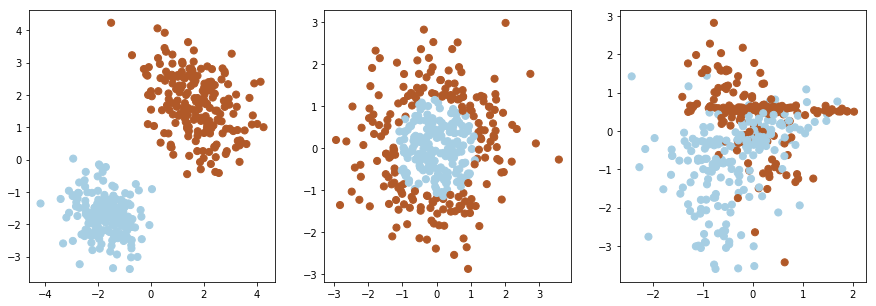

In [566]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification
import pylab as plt

random_state = 143
n_samples = 400
n_features = 2

datasets = []

X, y = make_classification(n_samples=n_samples, n_features = n_features, class_sep=1.7, n_redundant=0, n_clusters_per_class=1, 
                           random_state = random_state, flip_y=0)
y = 2 * y - 1
datasets.append((X, y))

X, y = make_gaussian_quantiles(n_samples=n_samples,n_features=n_features, n_classes=2,
                                        random_state=random_state)
y = 2 * y - 1
datasets.append((X, y))

X, y = make_classification(400, 2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=3, hypercube=False, 
                           flip_y=0.01, random_state = 15)
y = 2 * y - 1
datasets.append((X, y))

plt.figure(figsize=(15, 5))
for i in range(len(datasets)):
    X, y = datasets[i]
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

**(1 балл)** Протестируйте линейный SVM  на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Проделайте это для разных значений параметра $C$ (не менее 4-х).

In [567]:
from sklearn.svm import SVC

def linear_SVM_draw(X, y, C):
    clf = SVC(kernel='linear', C = C)
    clf.fit(X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(np.c_[XX.reshape(-1), YY.reshape(-1)]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

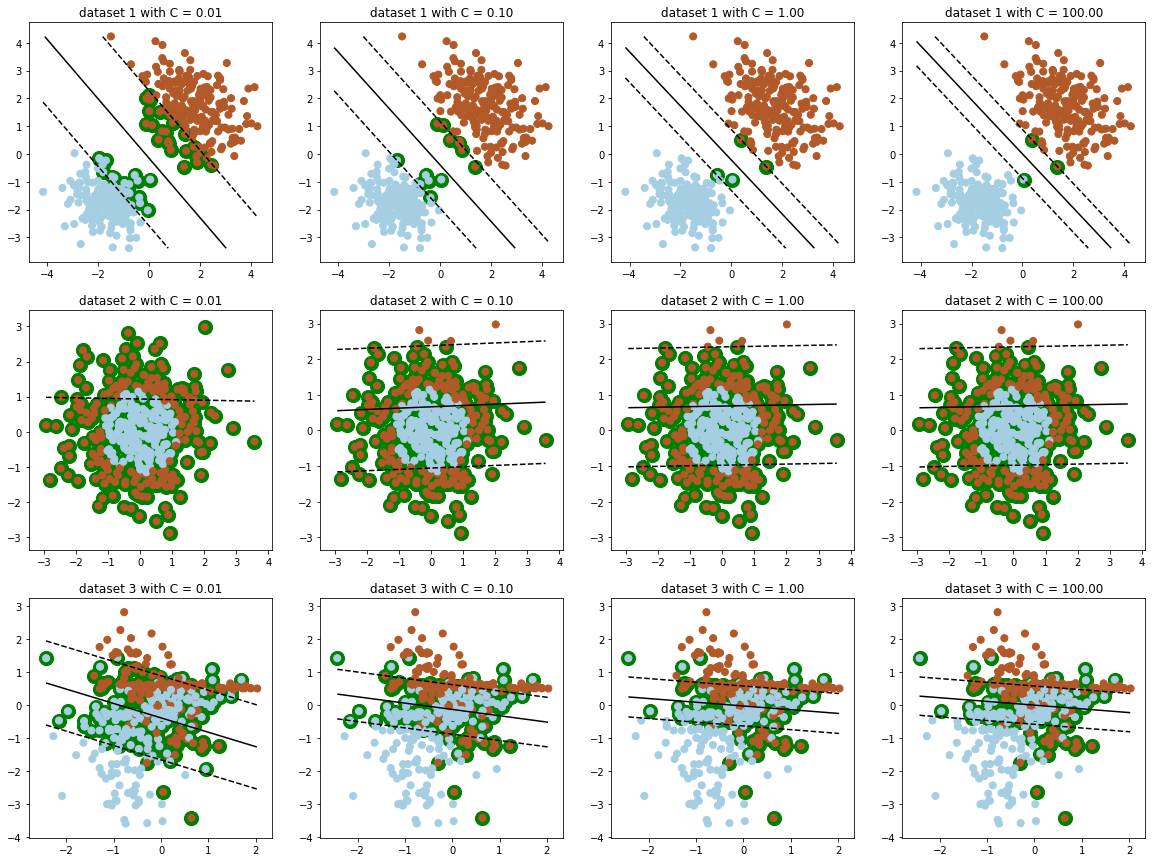

In [573]:
C = [0.01, 0.1, 1, 100]

plt.figure(figsize=(20,15))

for i in range(len(datasets)):
    X, y = datasets[i]
    for j in range(len(C)):
        plt.subplot(len(datasets), len(C), i * len(C) + j + 1)
        linear_SVM_draw(X, y, C[j])
        plt.title("dataset %d with C = %.2f" % (i + 1, C[j]))

**(1 балл)** Как зависит число опорных векторов от параметра $C$ для различных выборок?

Нарисуем график зависимости числа опорных векторов от C для всех трёх датасетов.

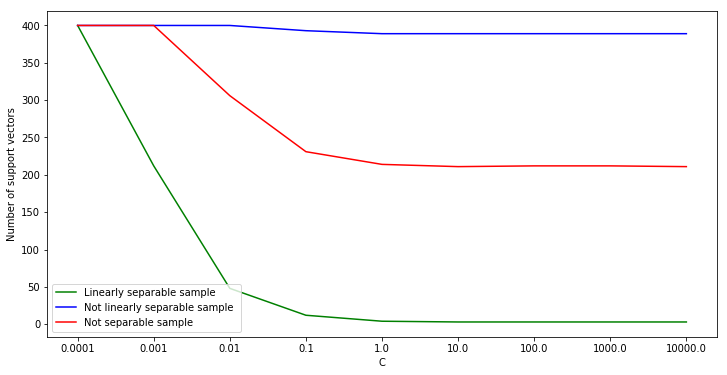

In [580]:
C = [10.**i for i in np.arange(-4, 5, 1)]
num_of_supports = np.zeros(shape=(3, len(C)))

for i in range(len(datasets)):  
    for j in range(len(C)):
        clf = SVC(kernel='linear', C = C[j])
        clf.fit(datasets[i][0], datasets[i][1])
        num_of_supports[i, j] = clf.n_support_.sum()

plt.figure(figsize=(12, 6))
plt.ylabel('Number of support vectors')
plt.xlabel('C')
plt.xticks(np.log10(C), C)
plt.plot(np.log10(C), num_of_supports[0], color='Green', label='Linearly separable sample')
plt.plot(np.log10(C), num_of_supports[1], color='Blue', label='Not linearly separable sample ')
plt.plot(np.log10(C),  num_of_supports[2], color='Red', label='Not separable sample')
plt.legend()

Видно, что число опорных векторов сильнее всего уменьшается с ростом C для линейно разделимой выборки (это было видно и по рисункам для C, там разделяющая полоса становилась уже, и опорных векторов становилось меньше). Больше всего опорных векторов для второго датасета с кружком. Там почти все элементы выборки опорные (что тоже видно по рисункам).

#### Явное преобразование признаков

Как и в случае с линейной регрессией, когда оптимальная разделяющая гиперплоскость не является линейной, данная модель является очень грубым решением. Линейная неразделимость объектов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, аналогичное добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

### Задание

**(1 балл)** На тех же данных используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Проделайте это для разных значений параметра $C$.

In [581]:
from sklearn.svm import SVC
import pylab as plt
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

def quadratic_SVM_draw(X, y, C):
    clf = SVC(kernel='linear', C = C)
    poly = PolynomialFeatures(2)
    poly_X = poly.fit_transform(X)[:, 1:]
    clf.fit(poly_X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(poly.fit_transform(np.c_[XX.reshape(-1), YY.reshape(-1)])[:, 1:]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

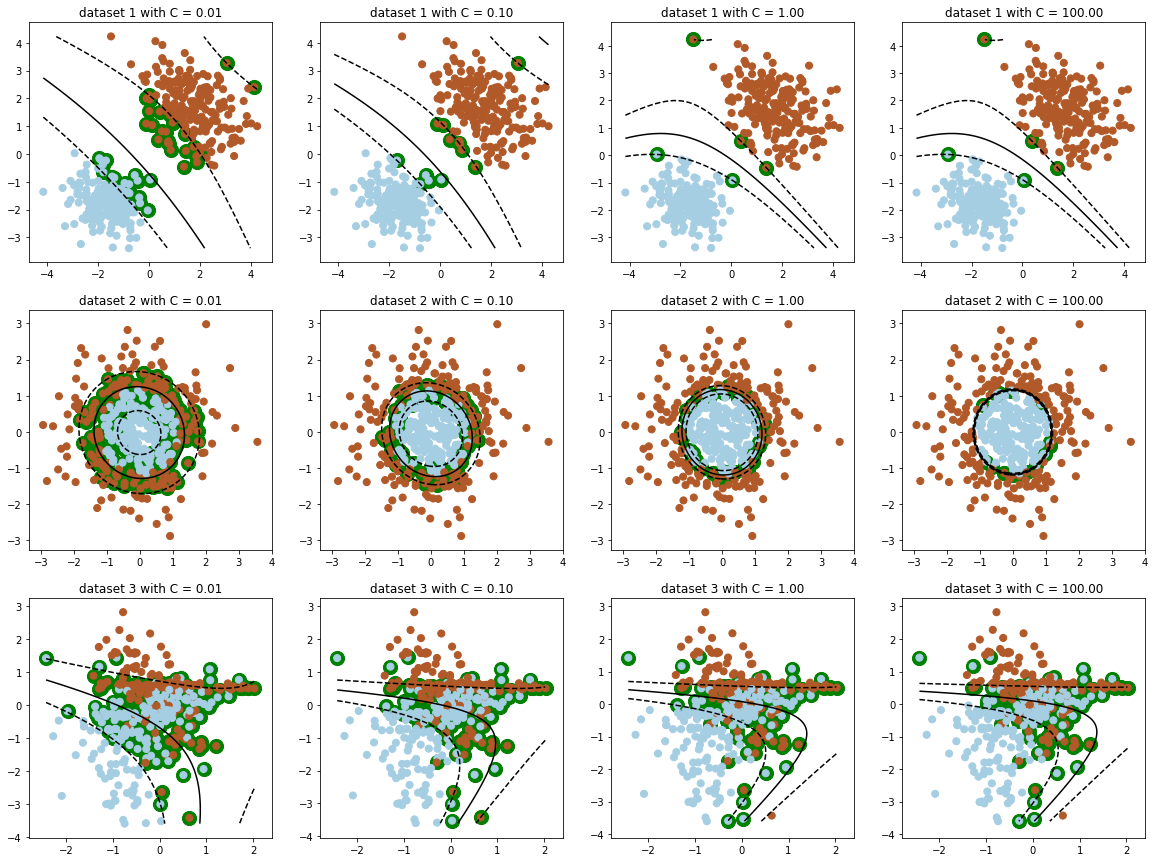

In [584]:
C = [0.01, 0.1, 1, 100]

plt.figure(figsize = (20, 15))

for i in range(len(datasets)):
    X, y = datasets[i]
    for j in range(len(C)):
        plt.subplot(len(datasets), len(C), i * len(C) + j + 1)
        quadratic_SVM_draw(X, y, C[j])
        plt.title("dataset %d with C = %.2f" % (i + 1, C[j]))

## Двойственный переход и Ядровой SVM

![](http://i.imgur.com/bJAzRCt.png)

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](http://www.machinelearning.ru/wiki/images/2/25/SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 


В этом задании используйте класс $sklearn.svm.SVC$, меняя тип ядра. 

### Задание

**(1.5 балла)** Протестируйте на предыдущих двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
- линейная: $k(x, x') = x^Tx'$
- полиномиальная: $k(x, x') = (x^Tx' + 1)^d$ с различными степенями $d = 2,3,\dots$
- Гауссовская-RBF: $k(x, x') = \exp(-\sigma\|x - x'\|^2)$

Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $d$?
 - Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\sigma$? Поварьируйте параметры $C$ и $\sigma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

Линейная ядровая функция соответствует линейному SVM, который уже был нарисован ранее.

In [607]:
from sklearn.svm import SVC
import pylab as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

%matplotlib inline

def kernel_SVM_draw(X, y, C, kernel, degree=0, gamma=0):
    if kernel == 'poly':
        clf = SVC(kernel=kernel, C=C, degree=degree)
        clf.fit(X, y)
    else:
        clf = SVC(kernel=kernel, C=C, gamma=gamma)
        clf.fit(X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(np.c_[XX.reshape(-1), YY.reshape(-1)]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

def DrawPolyKernel(deg, datasets, kernel):
    C = [0.01, 0.1, 1, 100]
    plt.figure(figsize=(20, 15))
    plt.suptitle('Polynomial kernel, degree = {}'.format(deg), fontsize = 20, y = 0.95)
    for i in range(len(datasets)):
        X, y = datasets[i]
        for j in range(len(C)):
            plt.subplot(len(datasets), len(C), i * len(C) + j + 1)
            kernel_SVM_draw(X, y, C[j], 'poly', degree=deg)
            plt.title("dataset %d with C = %.2f" % (i, C[j]))

def DrawRBFKernel(gamma, datasets, kernel):
    C = [0.01, 0.1, 1, 100]
    plt.figure(figsize=(20, 15))
    plt.suptitle('RBF kernel, gamma = %2f' %gamma, fontsize = 20, y = 0.95)
    for i in range(len(datasets)):
        X, y = datasets[i]
        for j in range(len(C)):
            plt.subplot(len(datasets), len(C), i * len(C) + j + 1)
            kernel_SVM_draw(X, y, C[j], 'rbf', gamma=gamma)
            plt.title("dataset %d with C = %.2f" % (i, C[j]))

# *SVM с полиномиальным ядром*

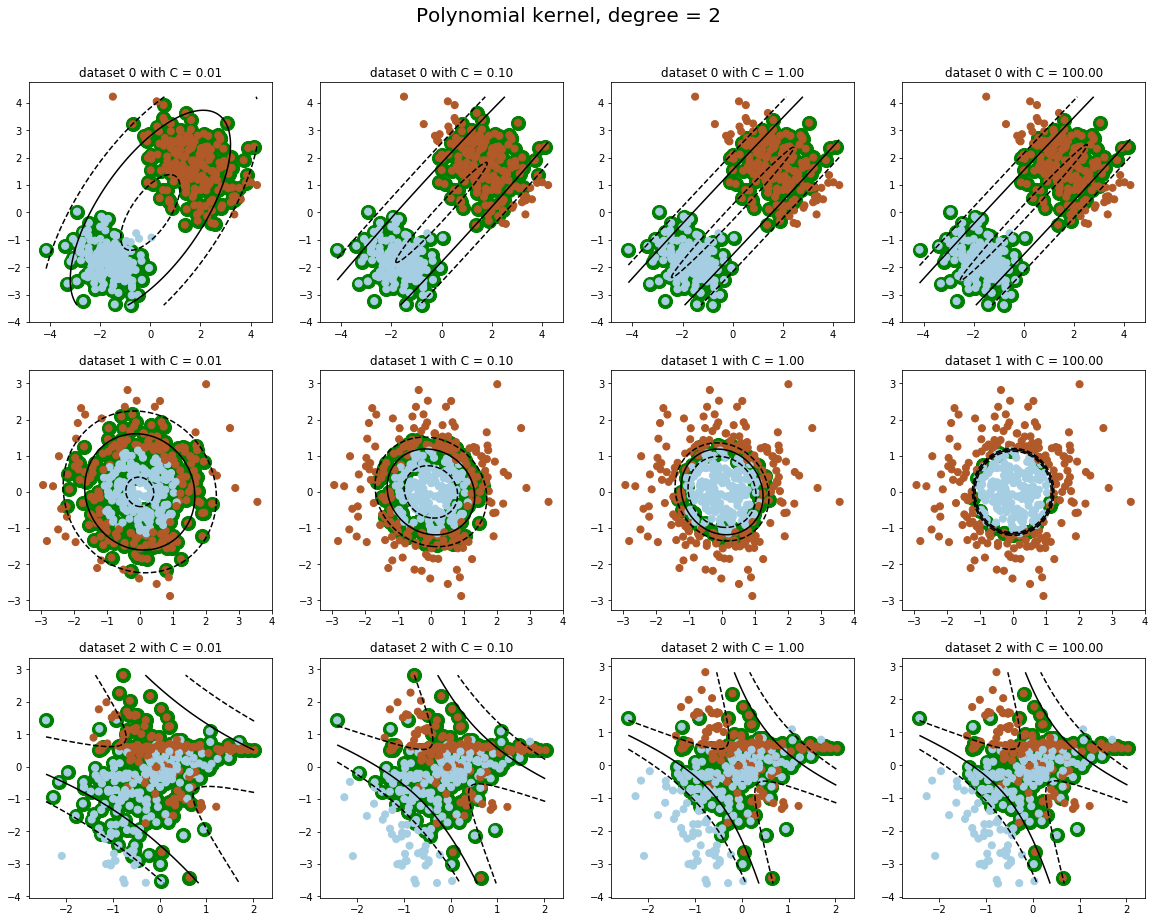

In [600]:
DrawPolyKernel(2, datasets, kernel='poly')

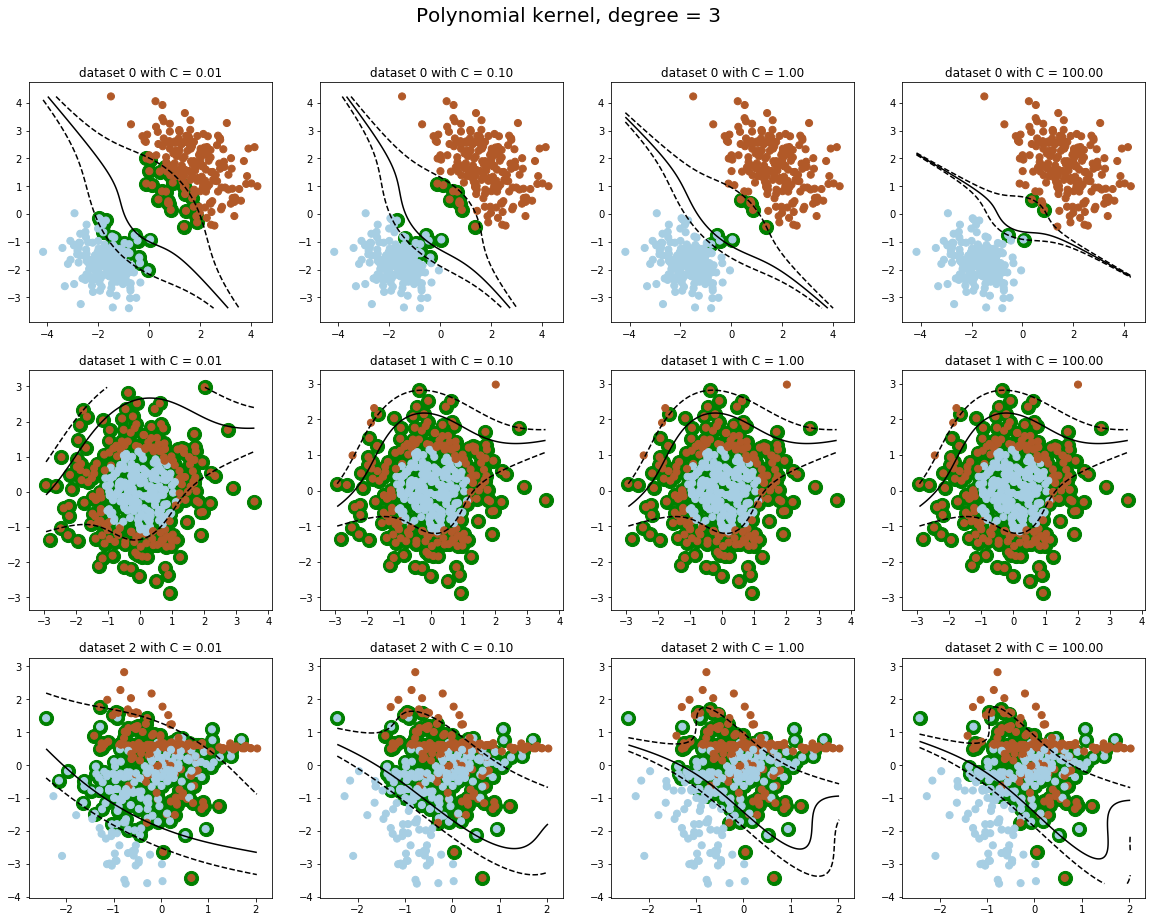

In [601]:
DrawPolyKernel(3, datasets, kernel='poly')

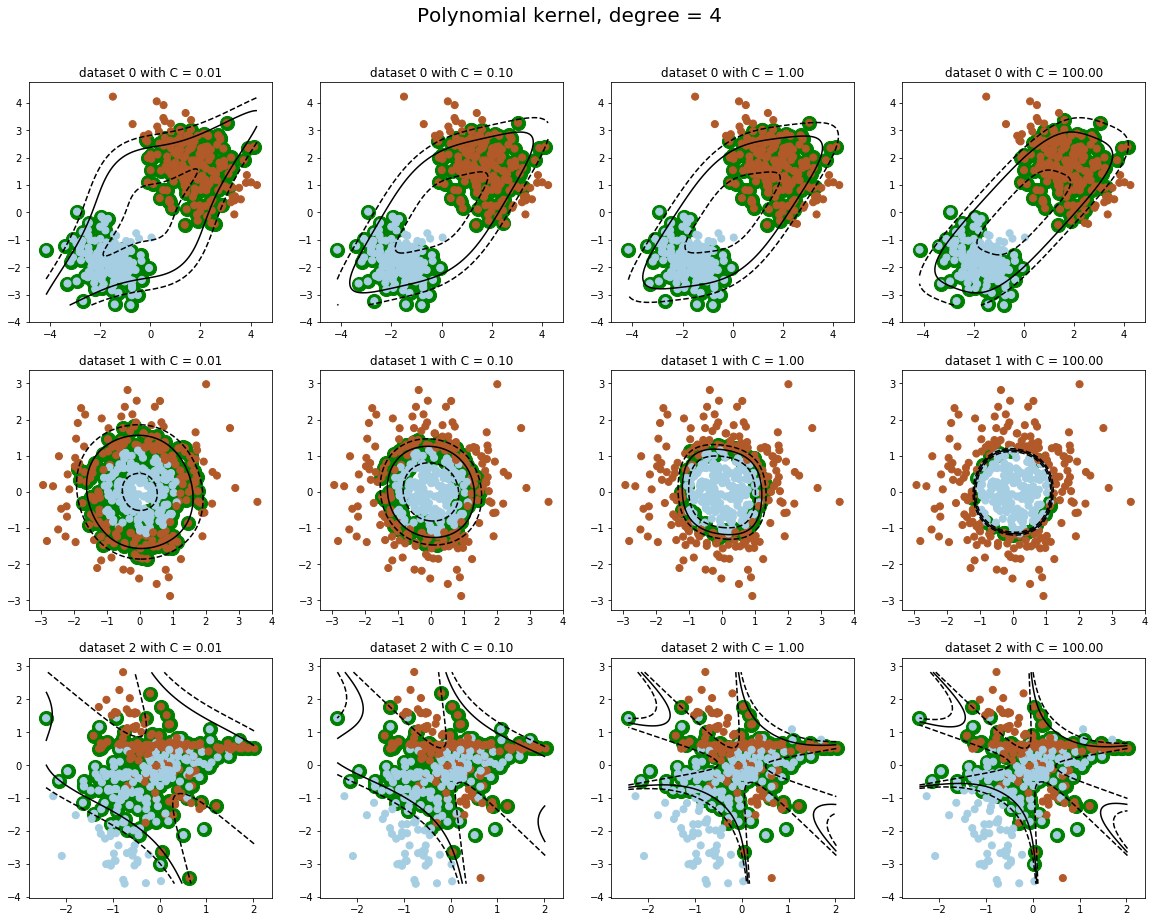

In [602]:
DrawPolyKernel(4, datasets, kernel='poly')

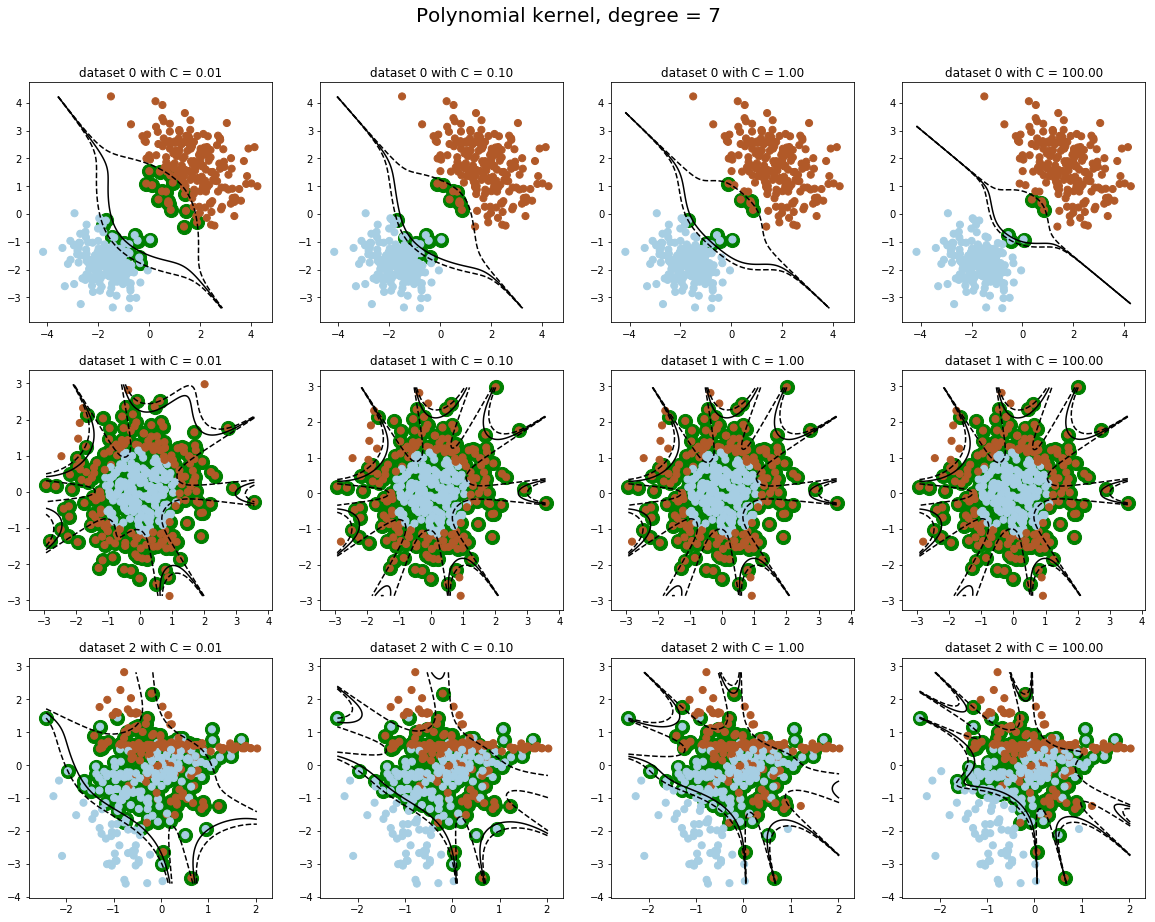

In [605]:
DrawPolyKernel(7, datasets, kernel='poly')

При увеличении C у полиномиального ядра уменьшается ширина разделяющей полосы и разделяющая поверхность всё больше приближается к данным. С увеличением степени разделяющие траектории усложняются и модель становится более чувствительна к данным. Так мы получаем более гибкую модель, но она становится склонной к переобучению и чувствительной к выбросам. При маленьких значениях C и degree модели становятся достаточно грубыми.

# *SVM c RBF-ядром*

In [616]:
gamma = [0.01, 0.1, 1, 100]

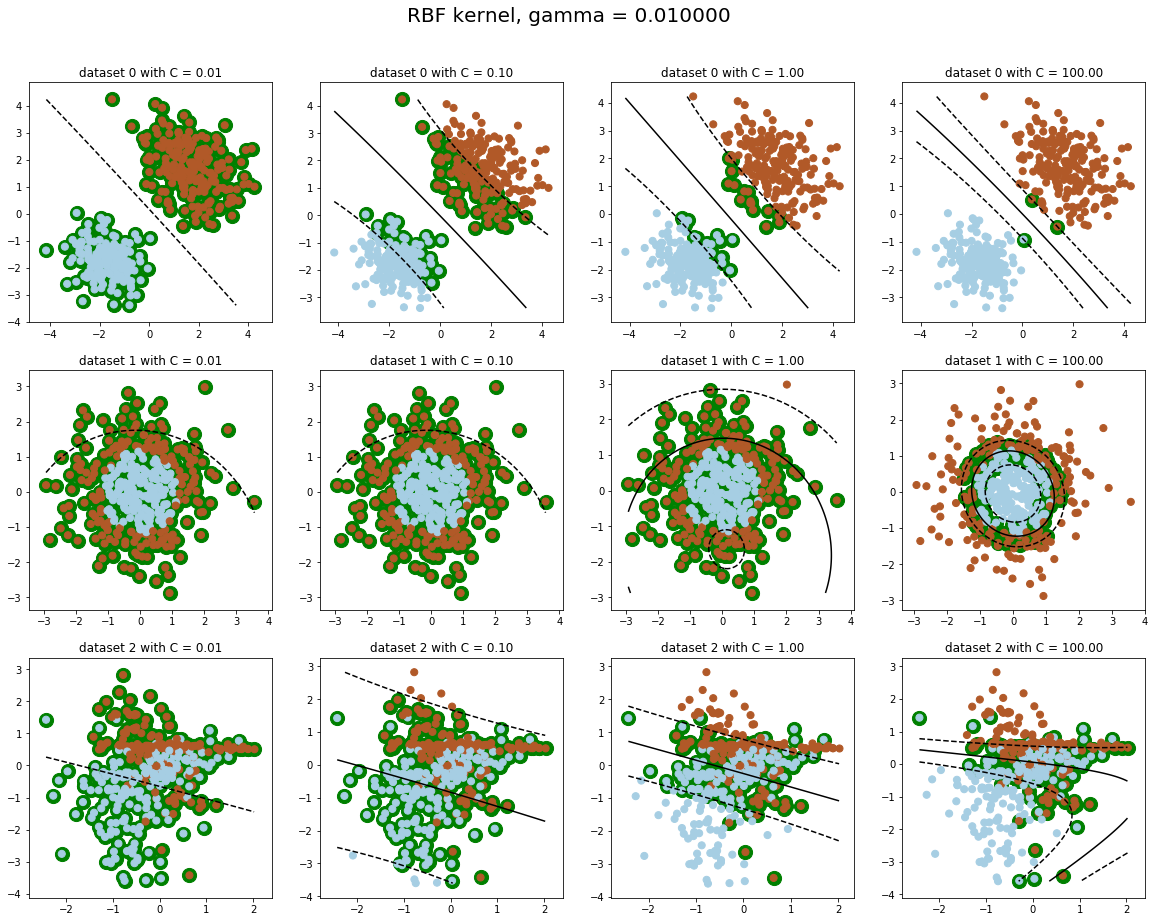

In [609]:
DrawRBFKernel(gamma[0], datasets, 'rbf')

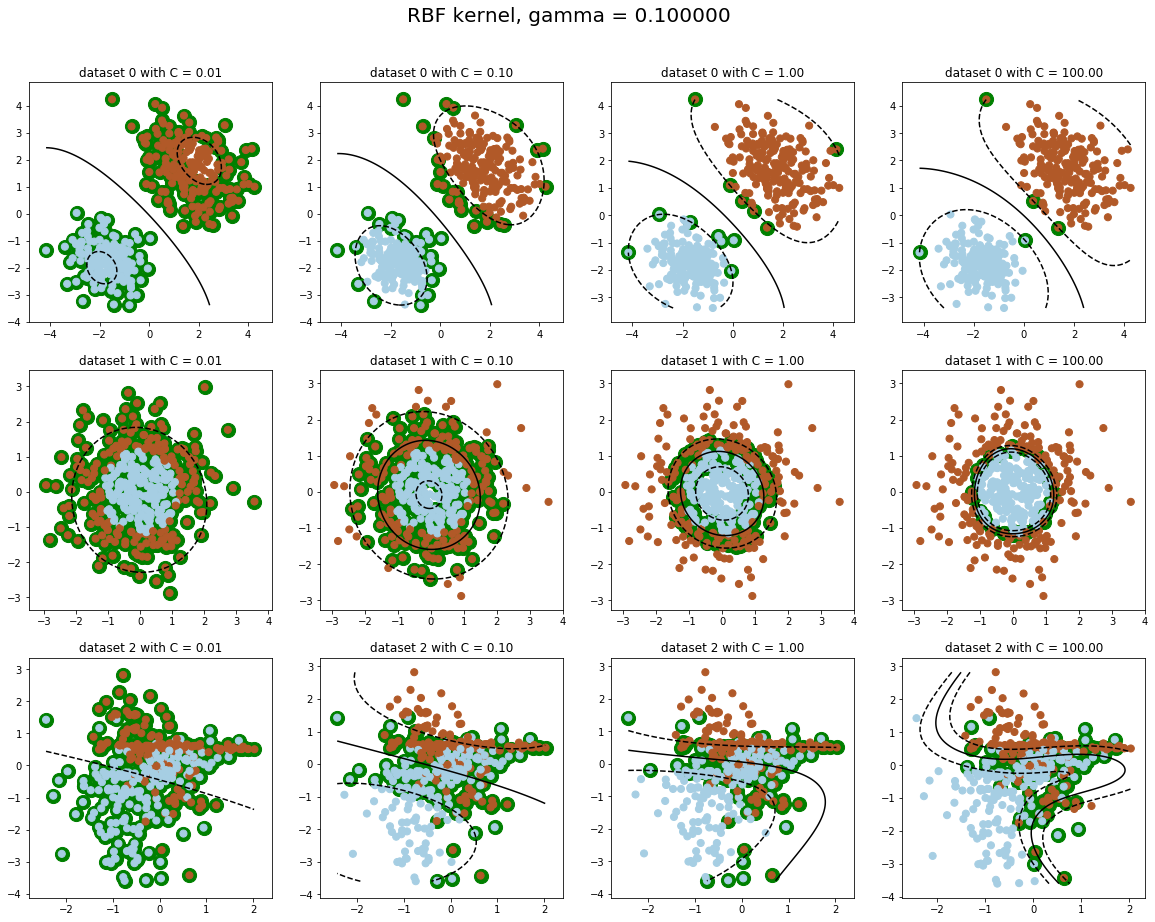

In [619]:
DrawRBFKernel(gamma[1], datasets, 'rbf')

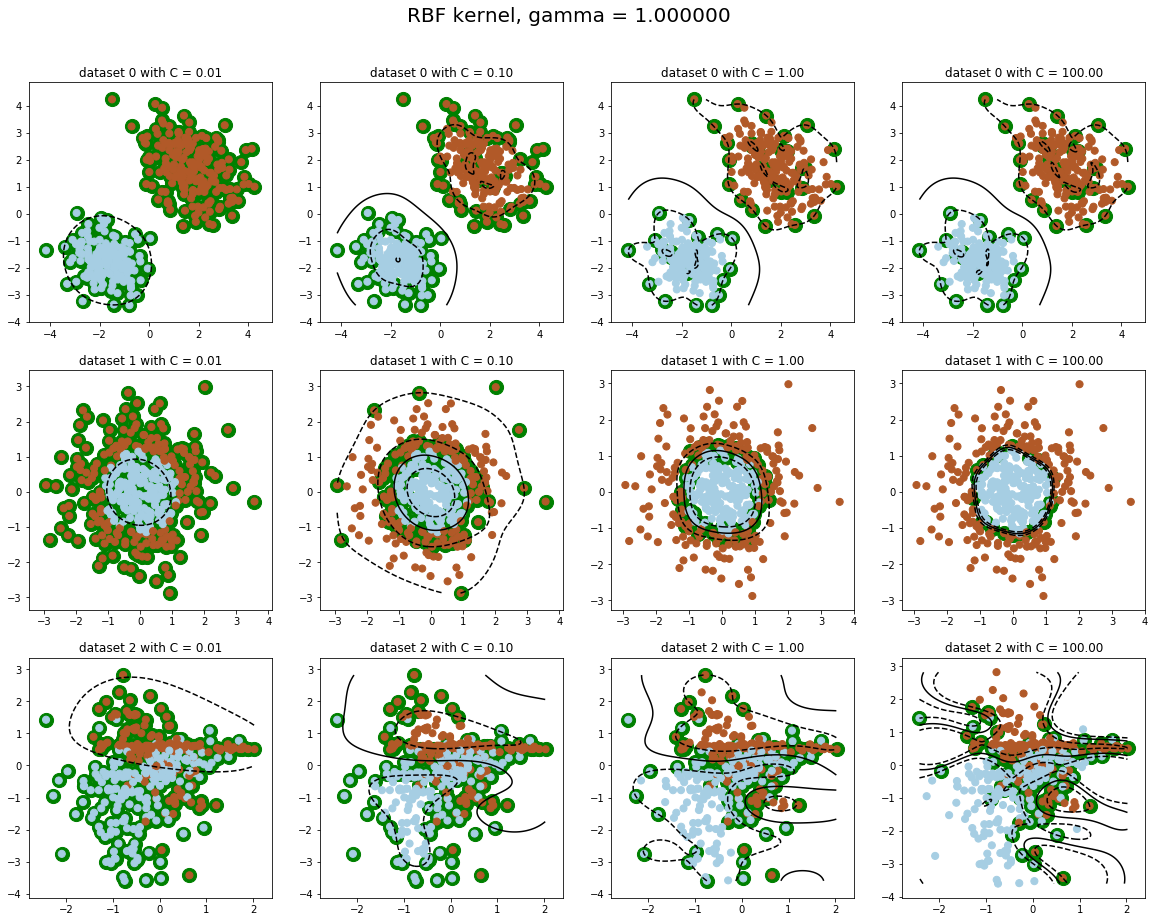

In [617]:
DrawRBFKernel(gamma[2], datasets, 'rbf')

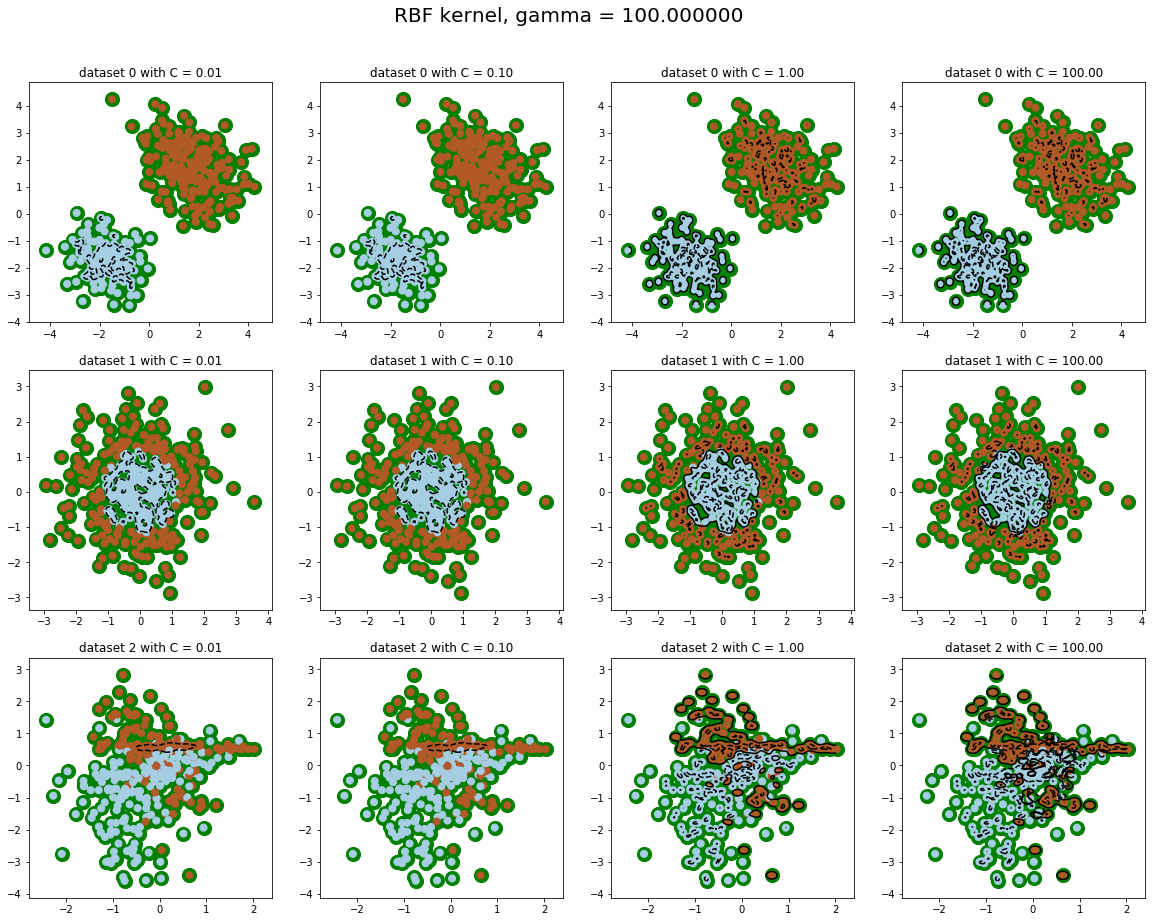

In [618]:
DrawRBFKernel(gamma[3], datasets, 'rbf')

При увеличении С, как и в предыдущих случаях, изменяется ширина разделяющей полосы. При малом гамма многие опорные векоры оказывают влияние на объект выборки, из-за этого траектории мало искривлены и при совсем малом гамма они почти линейны. С ростом гамма всё меньше опорных векторов оказывают влияние на объект выборки. Поэтому траектории становятся более сложными, и при большом гамма происходит переобучение -- разделяющая поверхность "обтекает" ровно точки каждого из классов.

## Выводы

**(1 балл)** В этой работе вы рассмотрели некоторые линейные модели машинного обучения, а также способы их обучения. Ответьте на следующие вопросы:

 - Какие есть достоинства у рассмотренных моделей? Поясните свой ответ для каждой модели.
 - Каким общим недостатком обладают данные модели? Какие есть способы его устранения? В чем может заключаться сложность использования этого подхода?
 - В чем заключаются различия с точки зрения обучения алгоритмов? Какие есть достоинства и недостатки у рассмотренных методов обучения?
 - Предположите в каком случае каждый из алгоритмов будет работать лучше: при большом/небольшом количестве данных? Поясните почему. 

Общее достоинство линейных моделей -- относительная простота и хорошая наглядность (и результаты хорошо интерпретируемы).

Общий недостаток -- лучше всего они работают именно на линейно разделимых данных. Для линейно неразделимых приходится усложнять модель: либо добавлять новые признаки (как в линейной регрессии и линейном SVM), либо использовать ядра вместо скалярного произведения (SVM).

#### Рассмотренные способы обучения линейных моделей: GD и SGD

GD -- сходится к неплохому качеству, но медленно. Поэтому при большом количестве данных лучше будет использовать SGD (да и в целом лучше использовать его). Общий недостаток SGD и GD -- могут застрять в локальном минимуме. Приходится придумывать способы избежания этой проблемы, такие как, например, Momentum и Adagrad.

### Линейная регрессия

Премуществом является хорошая сходимость, простота самой идеи метода (точнее, выбора функции потерь). Недостатком является большая приспособленность к линейно разделимым данным (приходится искусственно получать новые признаки) и плохая работа на сильно коррелированных данных (особенно это видно, если пытаемся посчитать по точной формуле, обратная матрица плохо ищется). При малом числе признаков для точного решения нужно обращать матрицу размера, равного числу признаков. Возможно, поэтому на больших данных с малым числом признаков точная формула может работать довольно хорошо (и вычисления, соответственно, будут быстрыми). Однако если признаков много, то придётся использовать SGD для поиска минимума. SGD хорошо работает с большими данными, поэтому линейная регрессия должно хорошо с ними справляться.

### Логистическая регрессия
Достоинства: представление результатов в виде вероятностей, хорошая сходимость градиентного спуска на оптимизируемой функции потерь. Обладает некоторыми недостатками, свойственными линейной регрессии – низкая устойчивость к ошибкам, зависимость от набора данных. Если добавить L1-регуляризацию, то логистическая регрессия может быть использована для отбора признаков (LASSO). Обучение регрессии происходит с помощью SGD, а он хорошо работает на больших данных, поэтому регрессию можно использовать на больших данных.

### SVM

Одно из важных преимуществ -- для построения разделяющей поверхности используется не вся выборка, а только "опорные" векторы, то есть во время обучения автоматически происходит отбор эталонов. Ещё одним преимуществом SVM является то, что он позволяет делать ядровые переходы, что значительно обогащает доступные нам разделяющие поверхности. Его недостатками являются неустойчивость к выбросам и долгое время обучения на больших объемах данных (приходится решать оптимизационную задачу, а в ней участвуют все объекты), а также отсутствие общего метода подбора ядра.